# Hedging Error ($)

_All metrics use **weekly absolute hedging errors** (n = 33).  
Differences are **mean(|y| − |x|)** with **y = first method named**.  
**Negative → y has lower error than x** (better). **Positive → y has higher error** (worse)._


## Figures

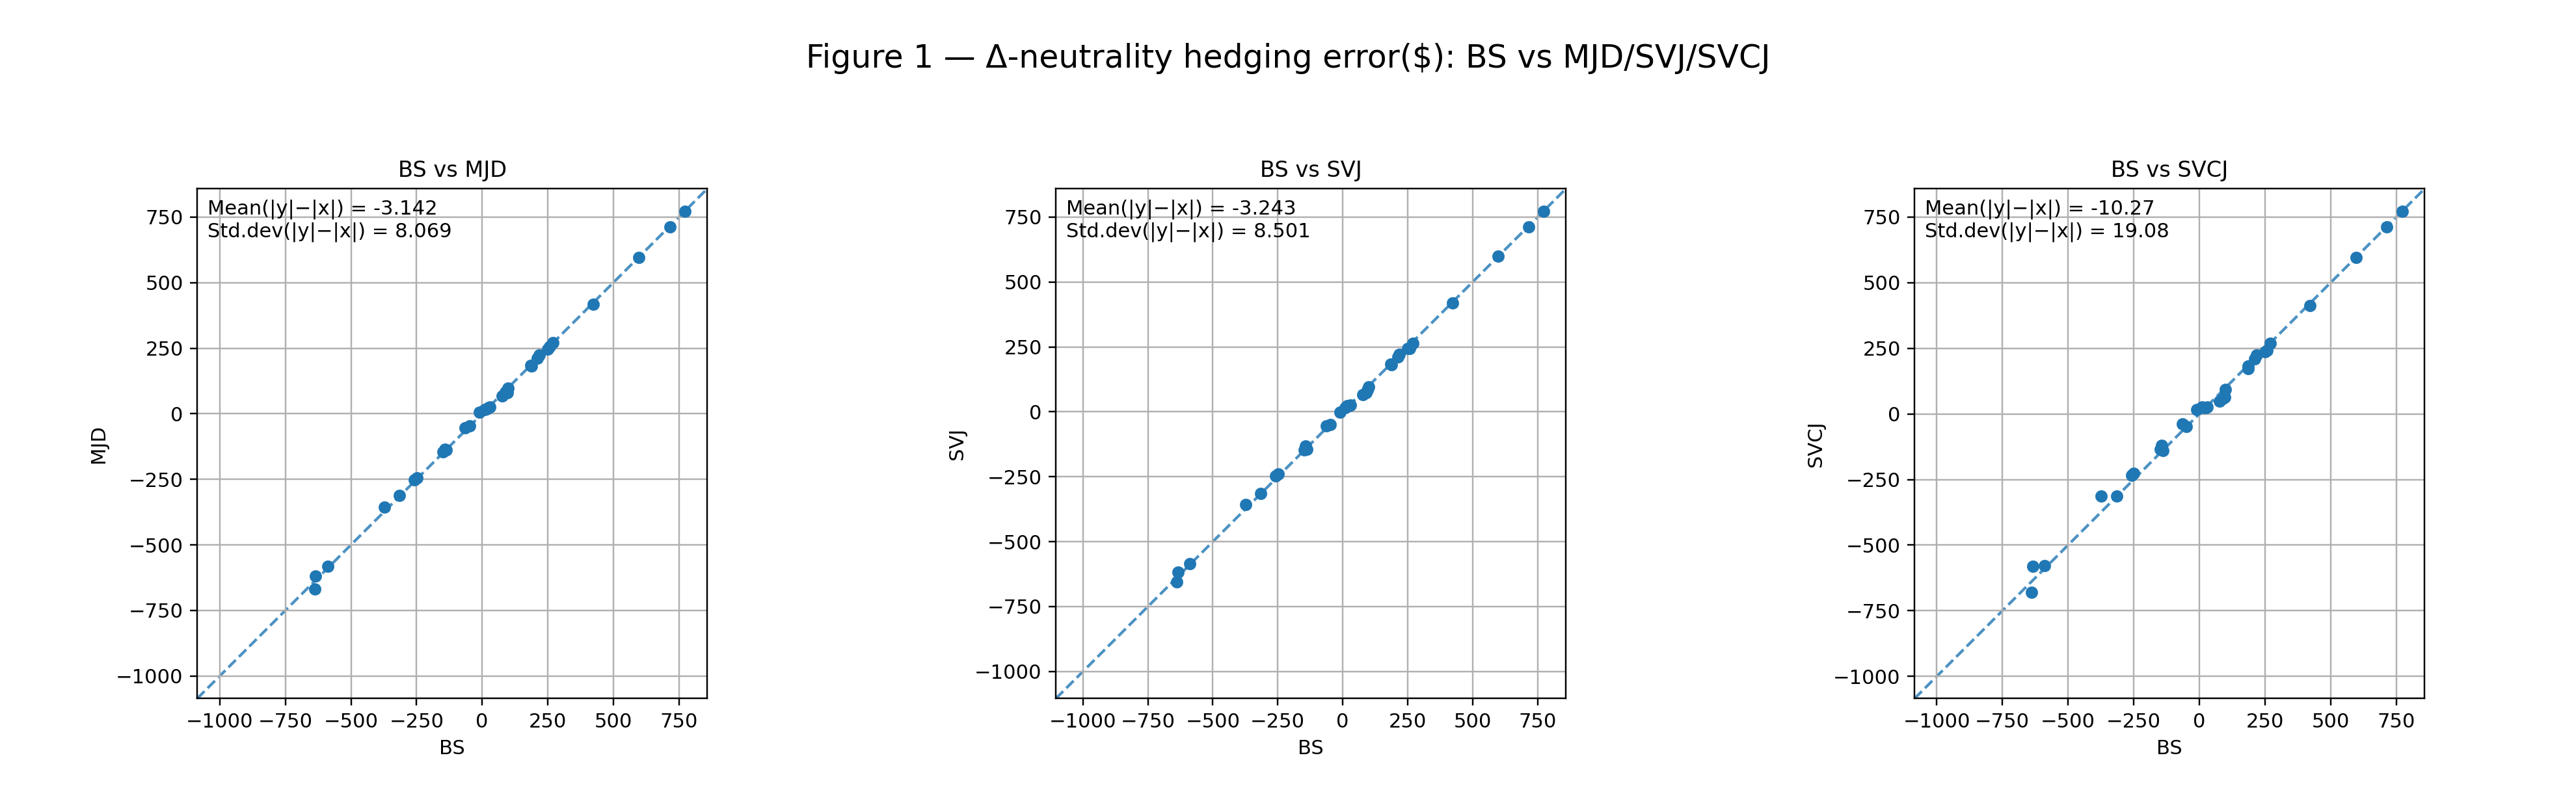
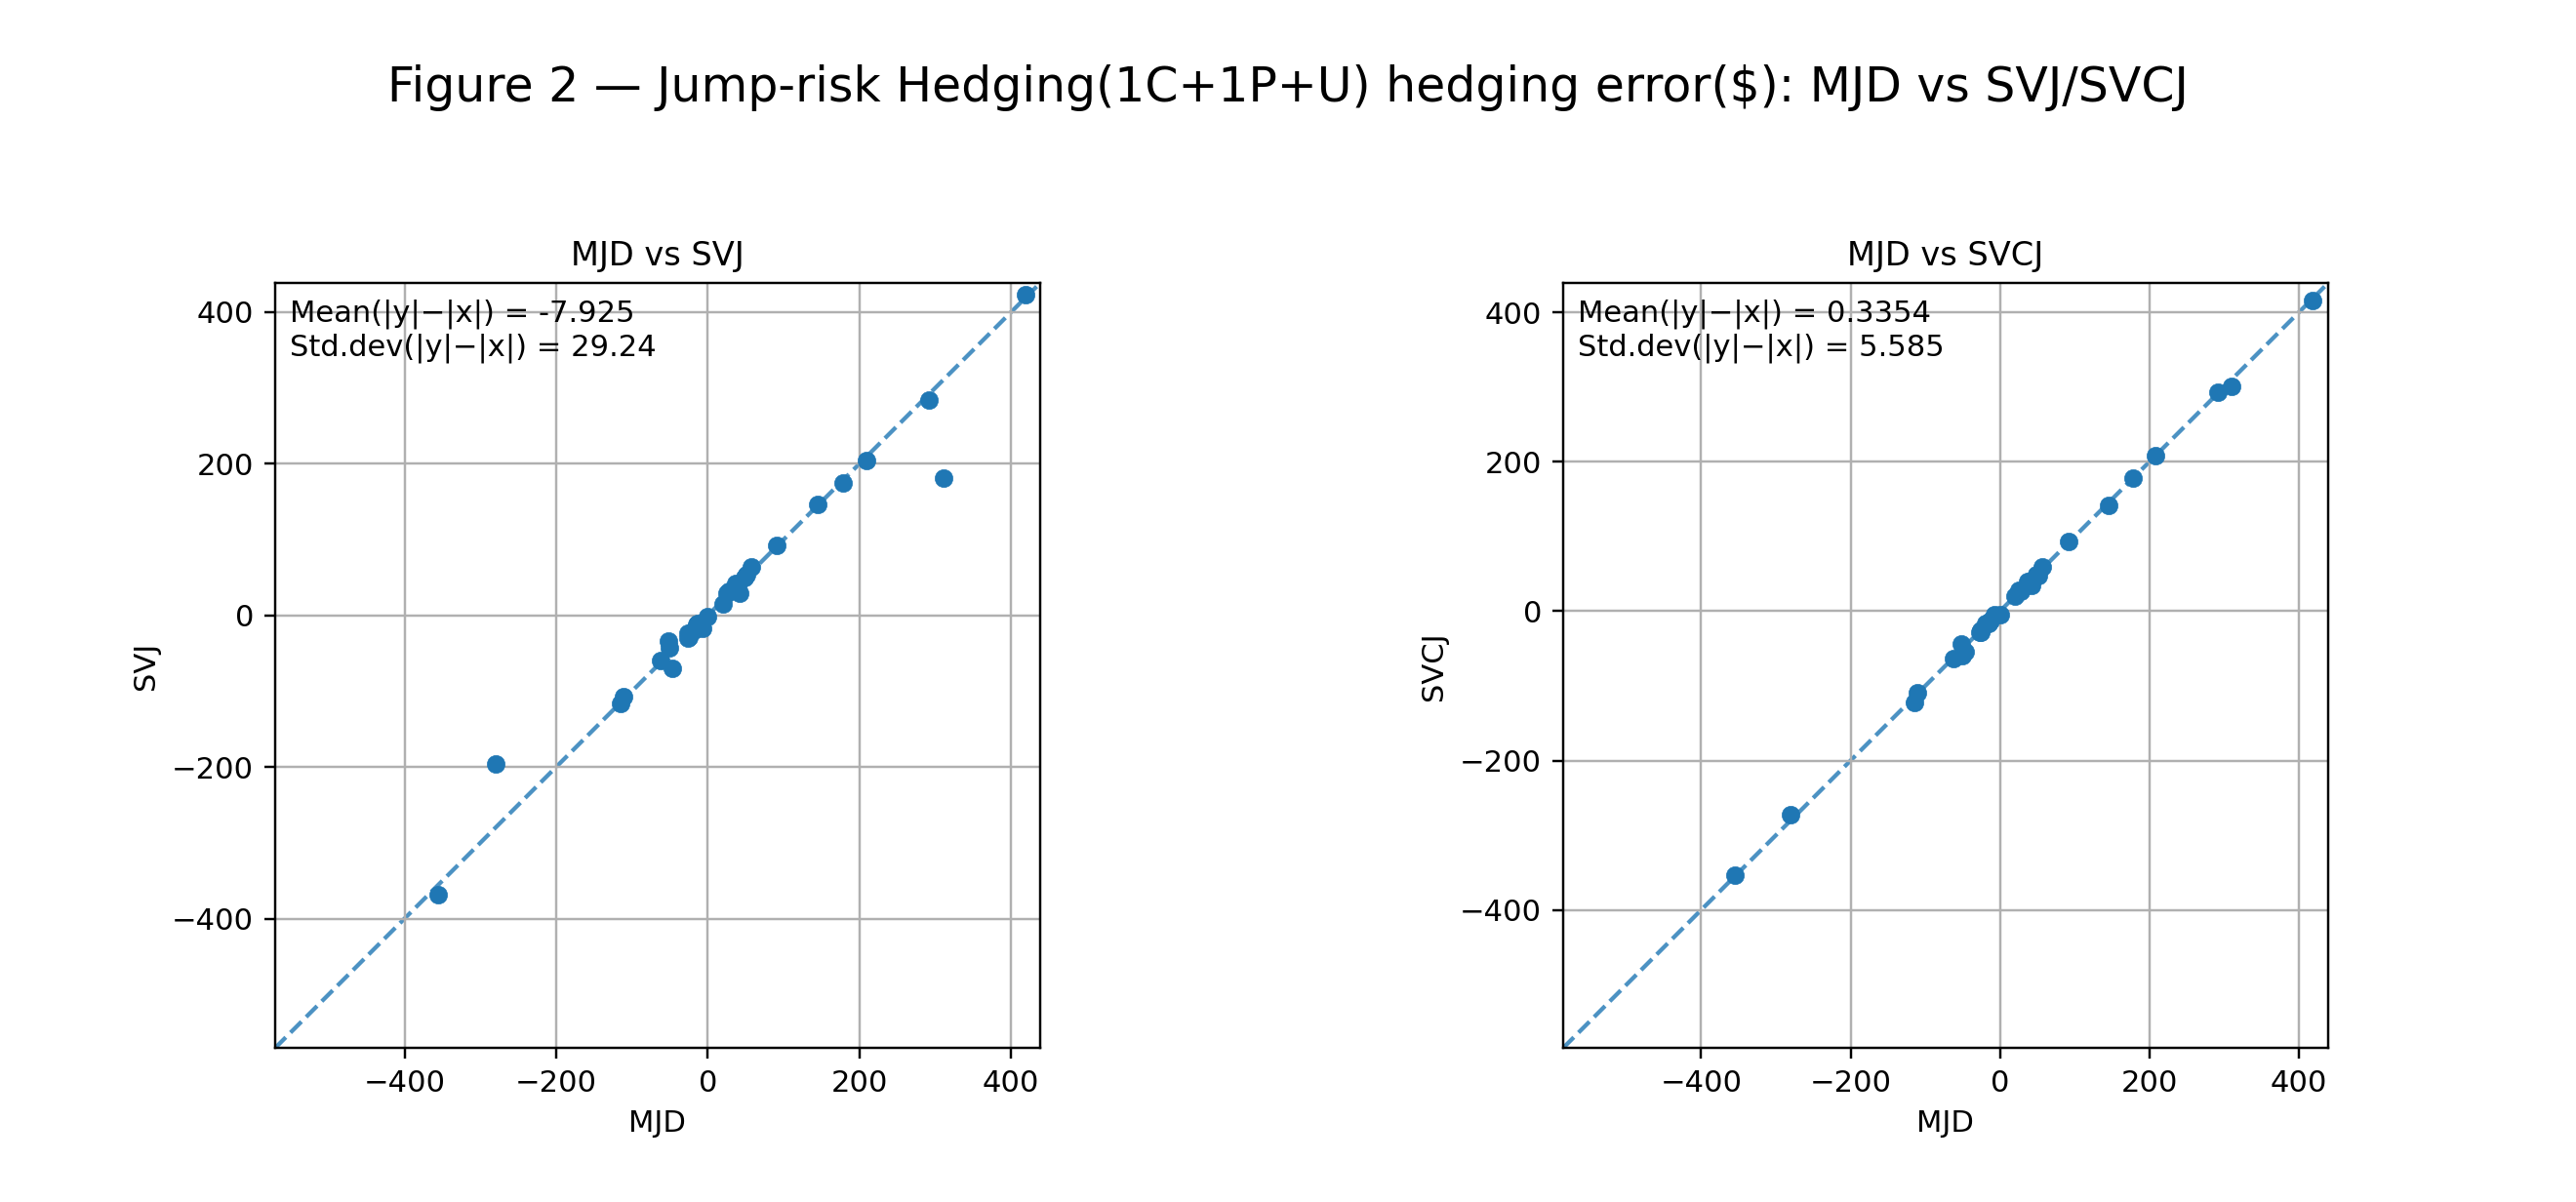
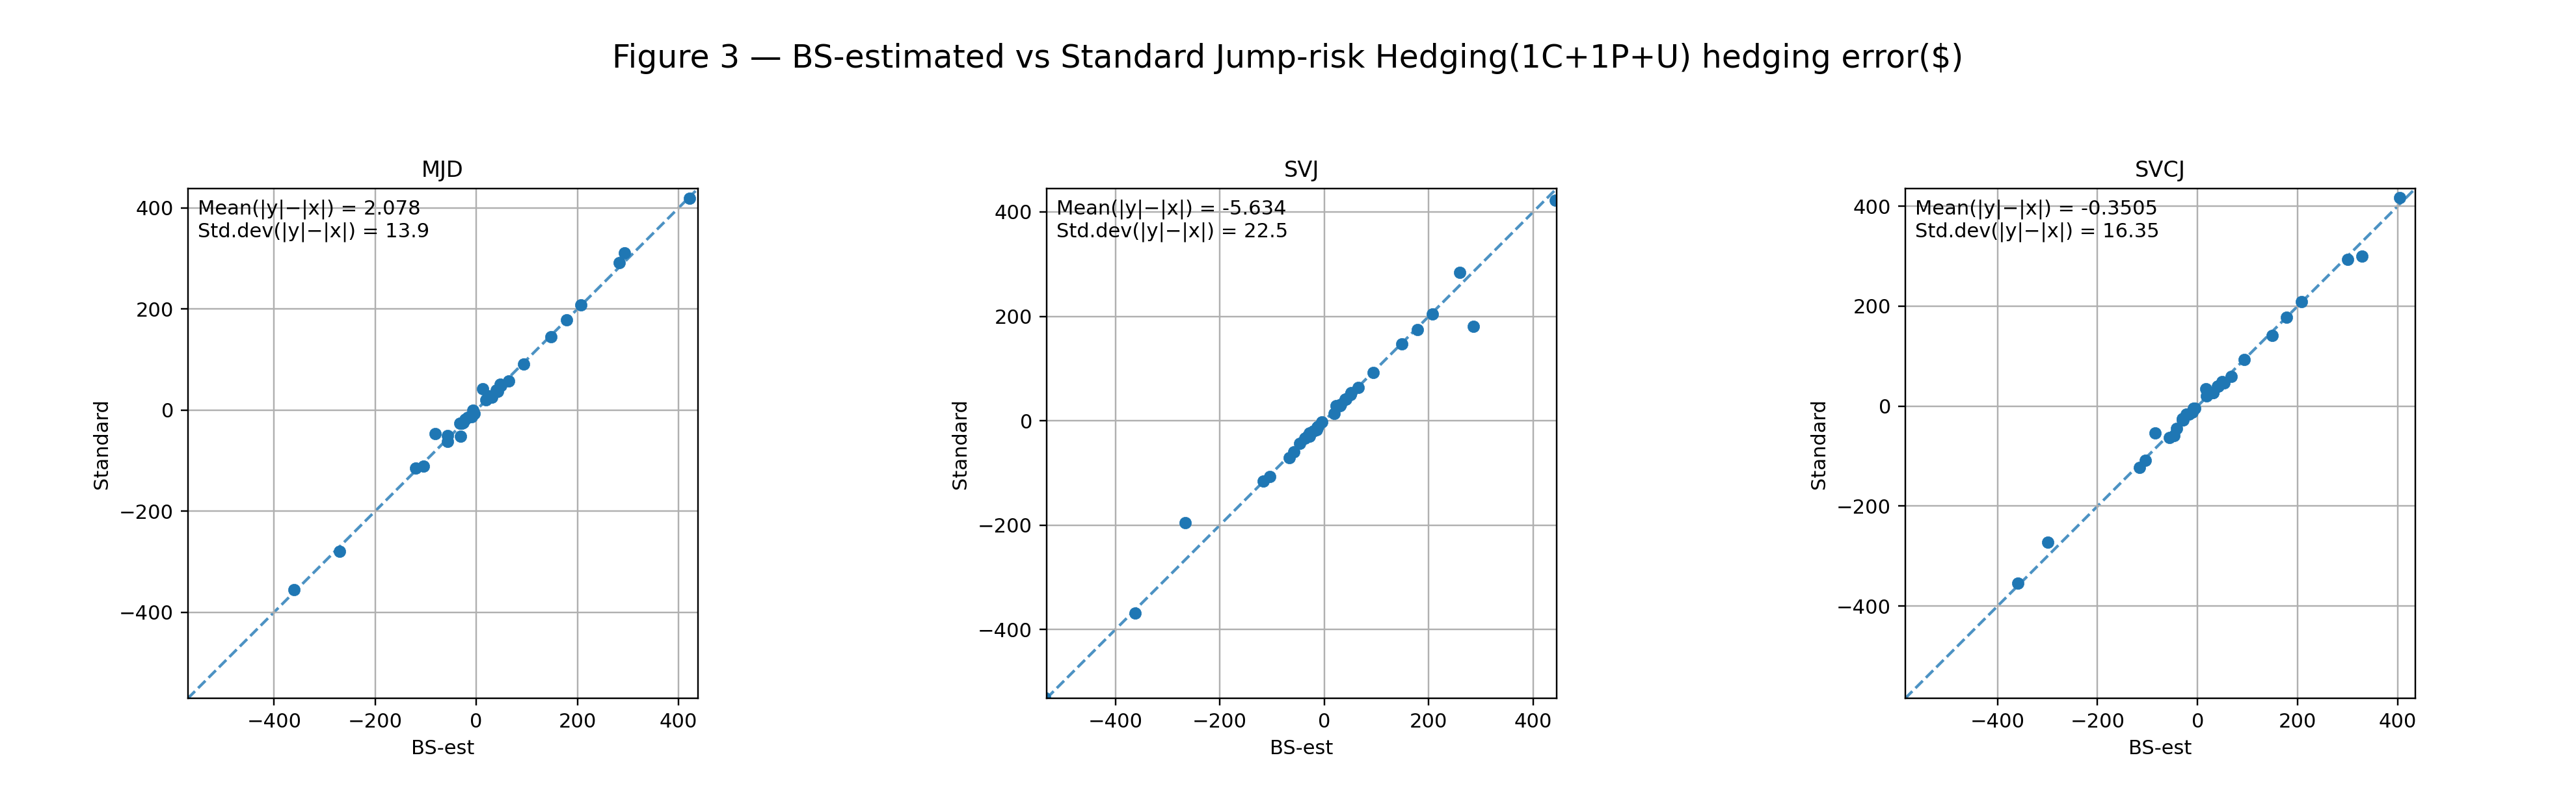
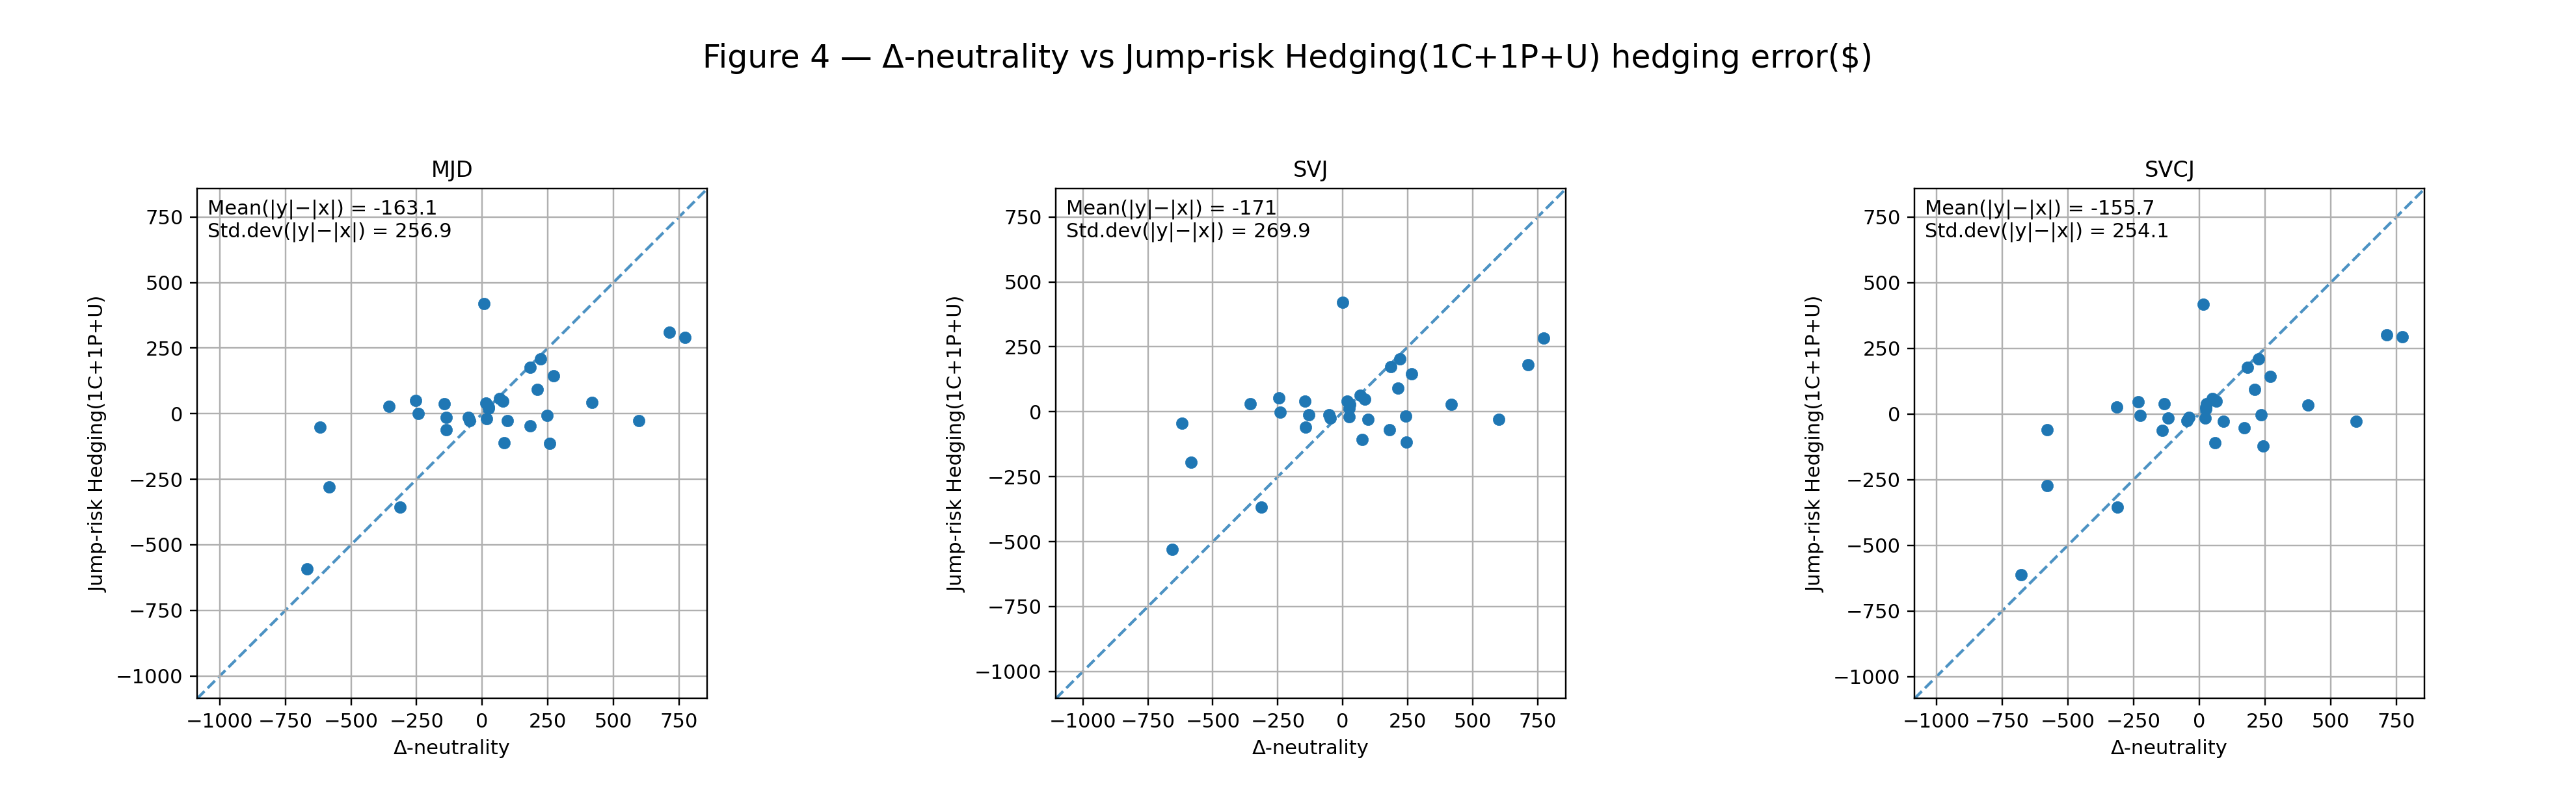
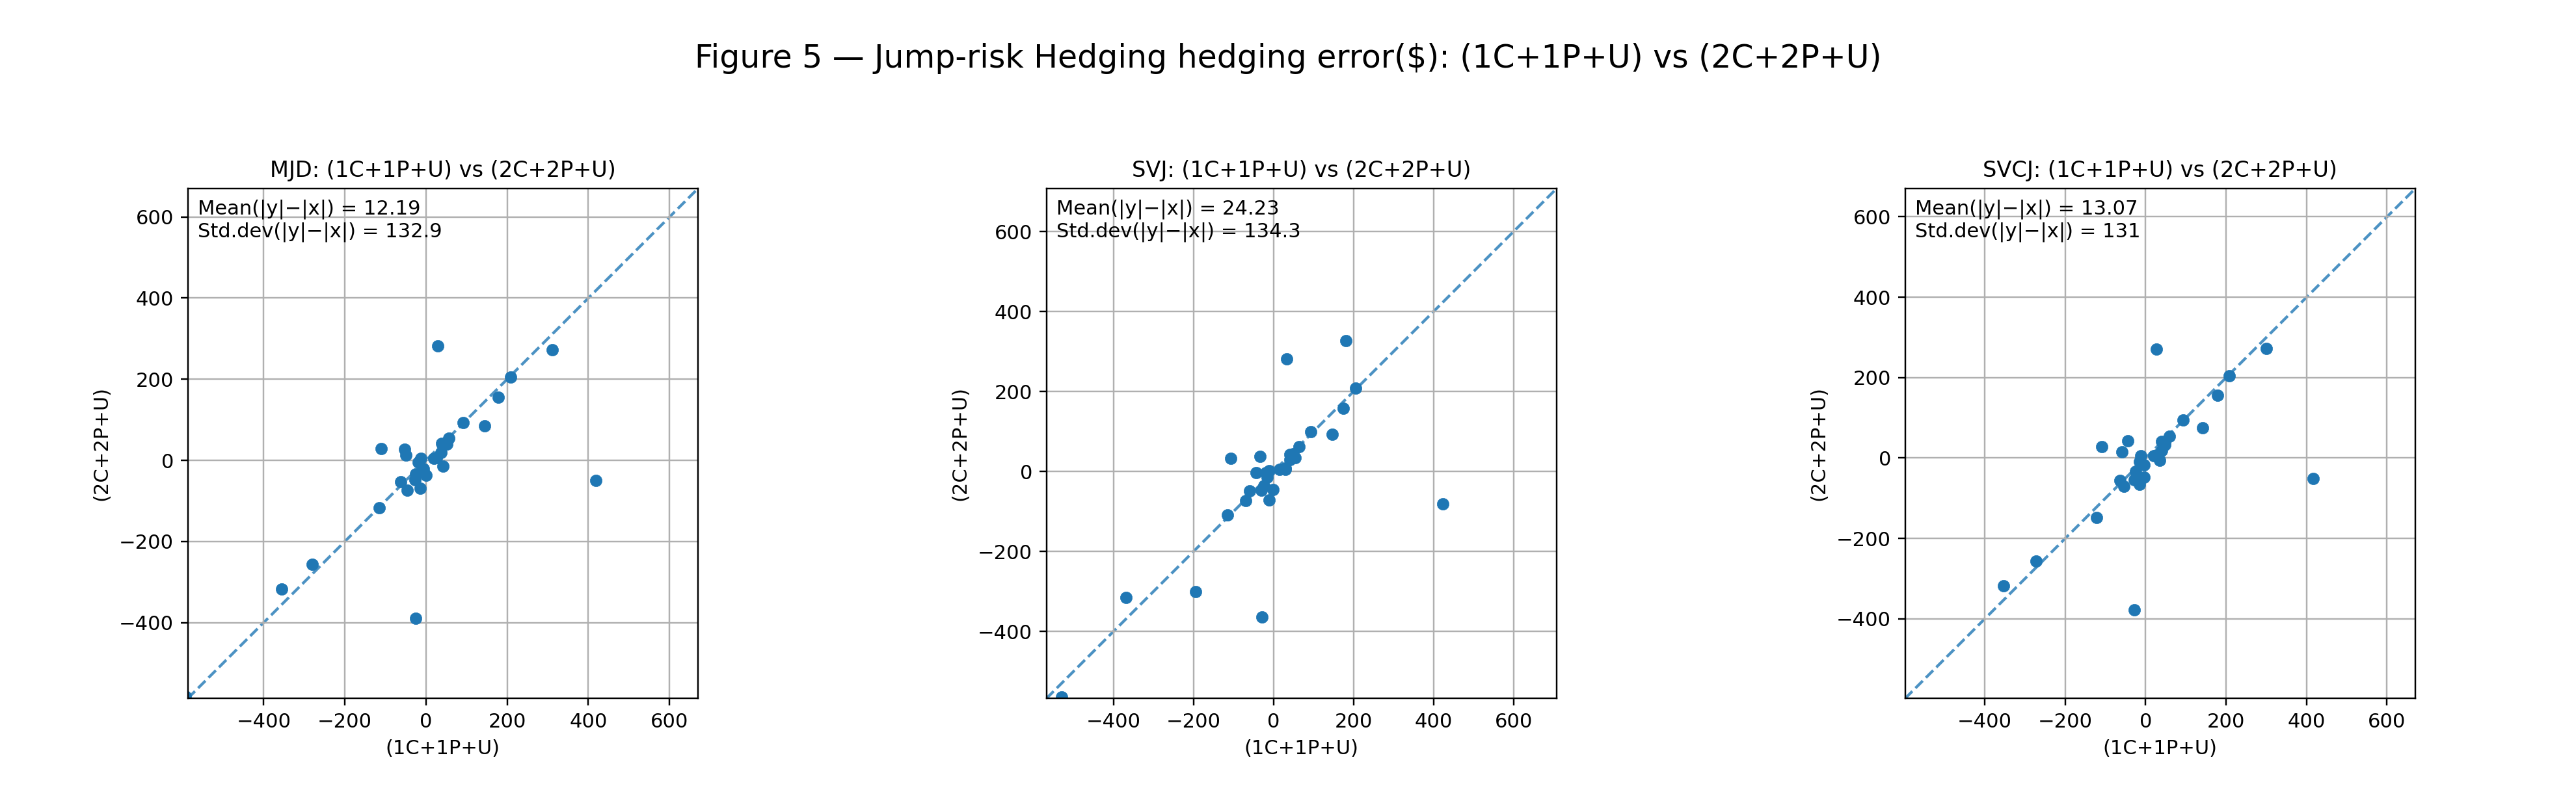

---

## 1) Δ-neutral (no options in the hedge)

- **MJD vs BS:** mean = **−3.142**, sd = **8.069**  
- **SVJ vs BS:** mean = **≈−3.24**, sd = **≈8.50**  
- **SVCJ vs BS:** mean = **−10.27**, sd = **19.08**

**Takeaway:** Under Δ-neutral, **SVCJ < SVJ ≲ MJD ≲ BS**; reductions vs BS are small for MJD/SVJ and largest for **SVCJ**.

---

## 2) Jump-Risk Hedging (JH, 1C+1P+U) **vs** Δ-neutral (same model)

- **MJD:** mean = **−163.1**, sd = **256.9**  
- **SVJ:** mean = **≈−171.0**, sd = **269.9**  
- **SVCJ:** mean = **−155.7**, sd = **254.1**

**Takeaway:** Adding **1 call + 1 put + underlying** to hedge **dramatically lowers errors** for every model (≈150–170 on average).

---

## 3) JH (1C+1P+U) — **model vs model**

- **SVJ vs MJD:** mean = **−7.925**, sd = **29.24**  
- **SVCJ vs MJD:** mean = **+0.335**, sd = **5.585**

**Takeaway:** Within JH, **SVJ** has a **small edge** over **MJD**; **SVCJ ≈ MJD** (differences are modest).

---

## 4) JH (1C+1P+U) — **implementation**: *Standard* vs *BS-estimated*  
_Difference is **Standard − BS-estimated** (negative favors **Standard**)._

- **MJD:** mean = **+2.078**, sd = **13.9**  → **BS-estimated** slightly better  
- **SVJ:** mean = **−5.634**, sd = **22.5** → **Standard** slightly better  
- **SVCJ:** mean = **−0.351**, sd = **16.35** → **No practical difference**

**Takeaway:** Implementation effects are **small**: pick **BS-est** for **MJD**, **Standard** for **SVJ**, and **either** for **SVCJ**.

---

## 5) JH — **capacity**: (2C+2P+U) vs (1C+1P+U)  
_Difference is **(2C+2P+U) − (1C+1P+U)**._

- **MJD:** mean = **+12.19**, sd = **132.9**  
- **SVJ:** mean = **+24.23**, sd = **134.3**  
- **SVCJ:** mean = **+13.07**, sd = **131**

**Takeaway:** Moving to **2C+2P+U** **does not reduce** errors; on average it’s **slightly worse** with similar dispersion.

---

### Bottom line (errors only)
- **JH (1C+1P+U)** **dominates Δ-neutral** for all models.  
- Within JH, **SVJ** is the **marginally best**; **SVCJ ≈ MJD**.  
- **Implementation choice** is **model-dependent but minor**.  
- **More instruments** don’t help here—**stick with 1C+1P+U** unless you have regime-specific evidence.


# Runtime (sec) — Comparisons Only
_All metrics use per-week wall-clock runtimes.  
For each row, the reported difference is **mean(|y| − |x|)** where **y** is the method named first (positive numbers = y typically slower)._

---
## Figures
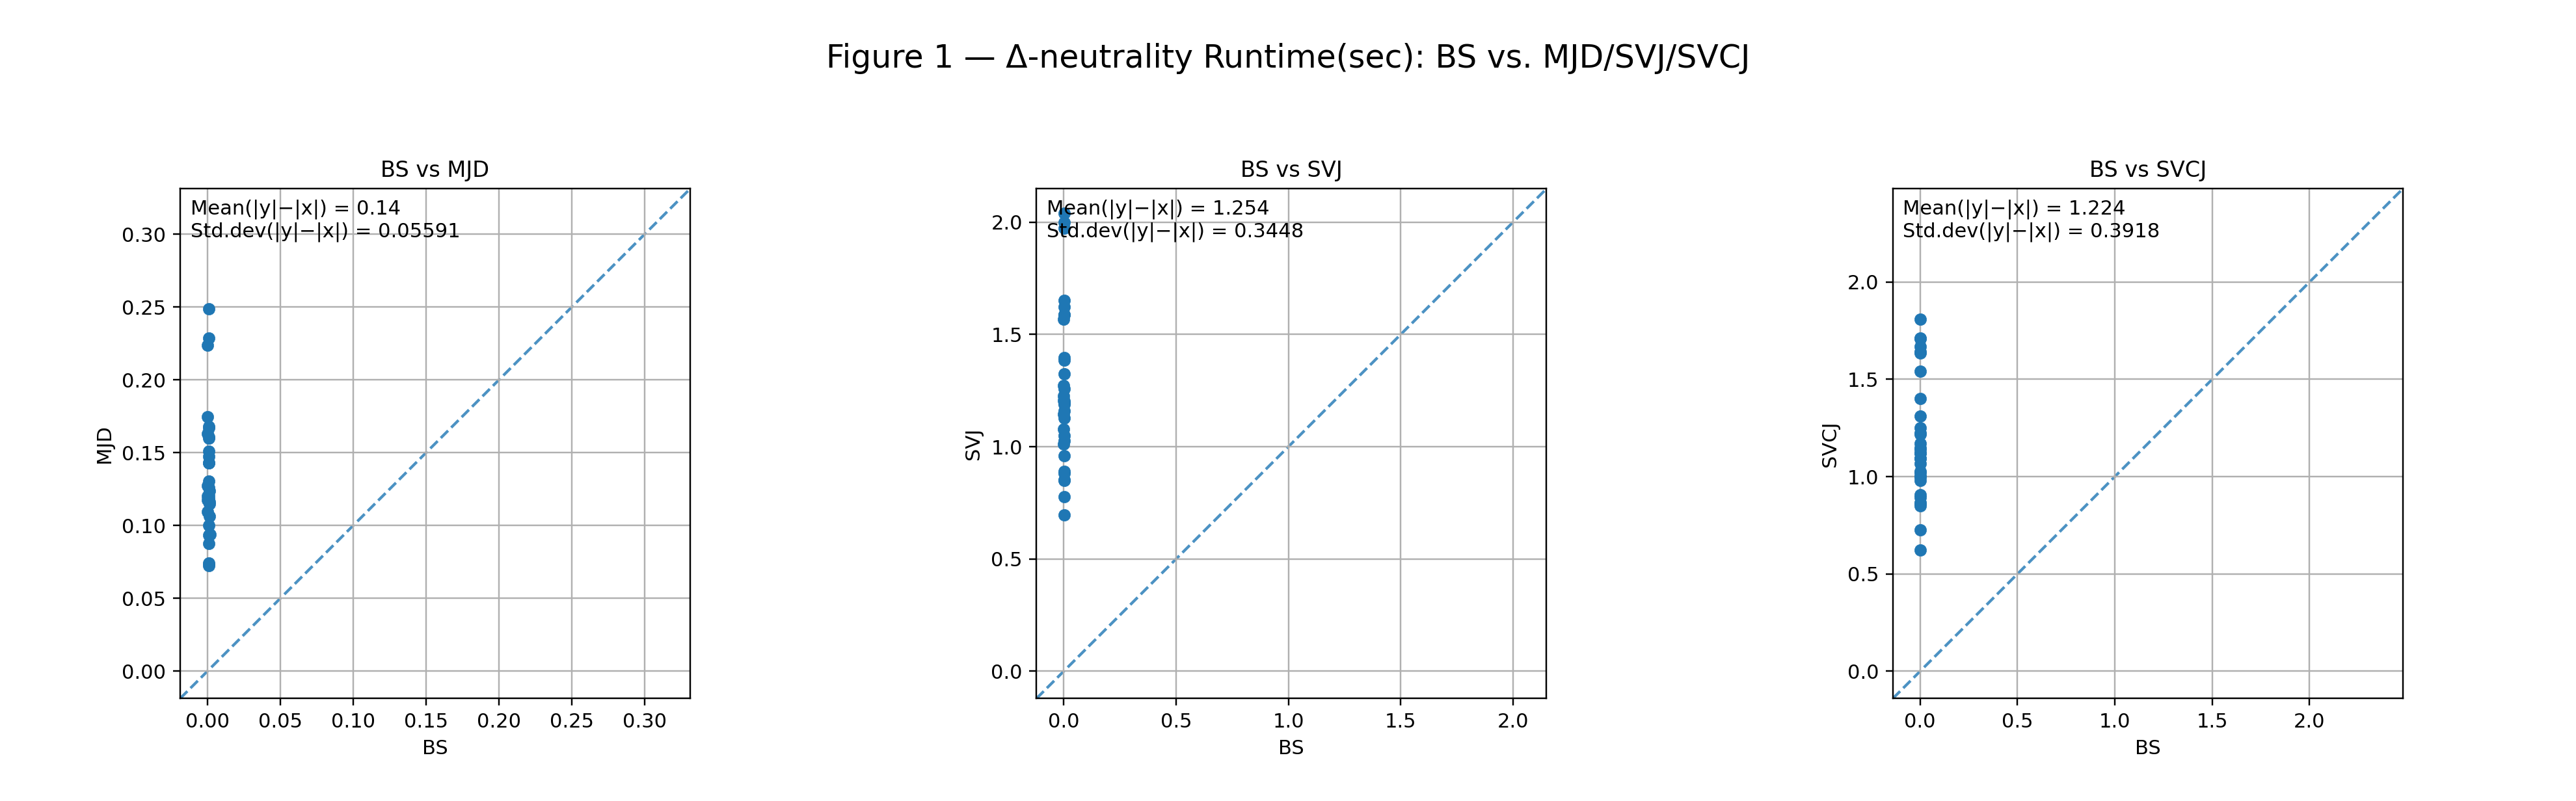
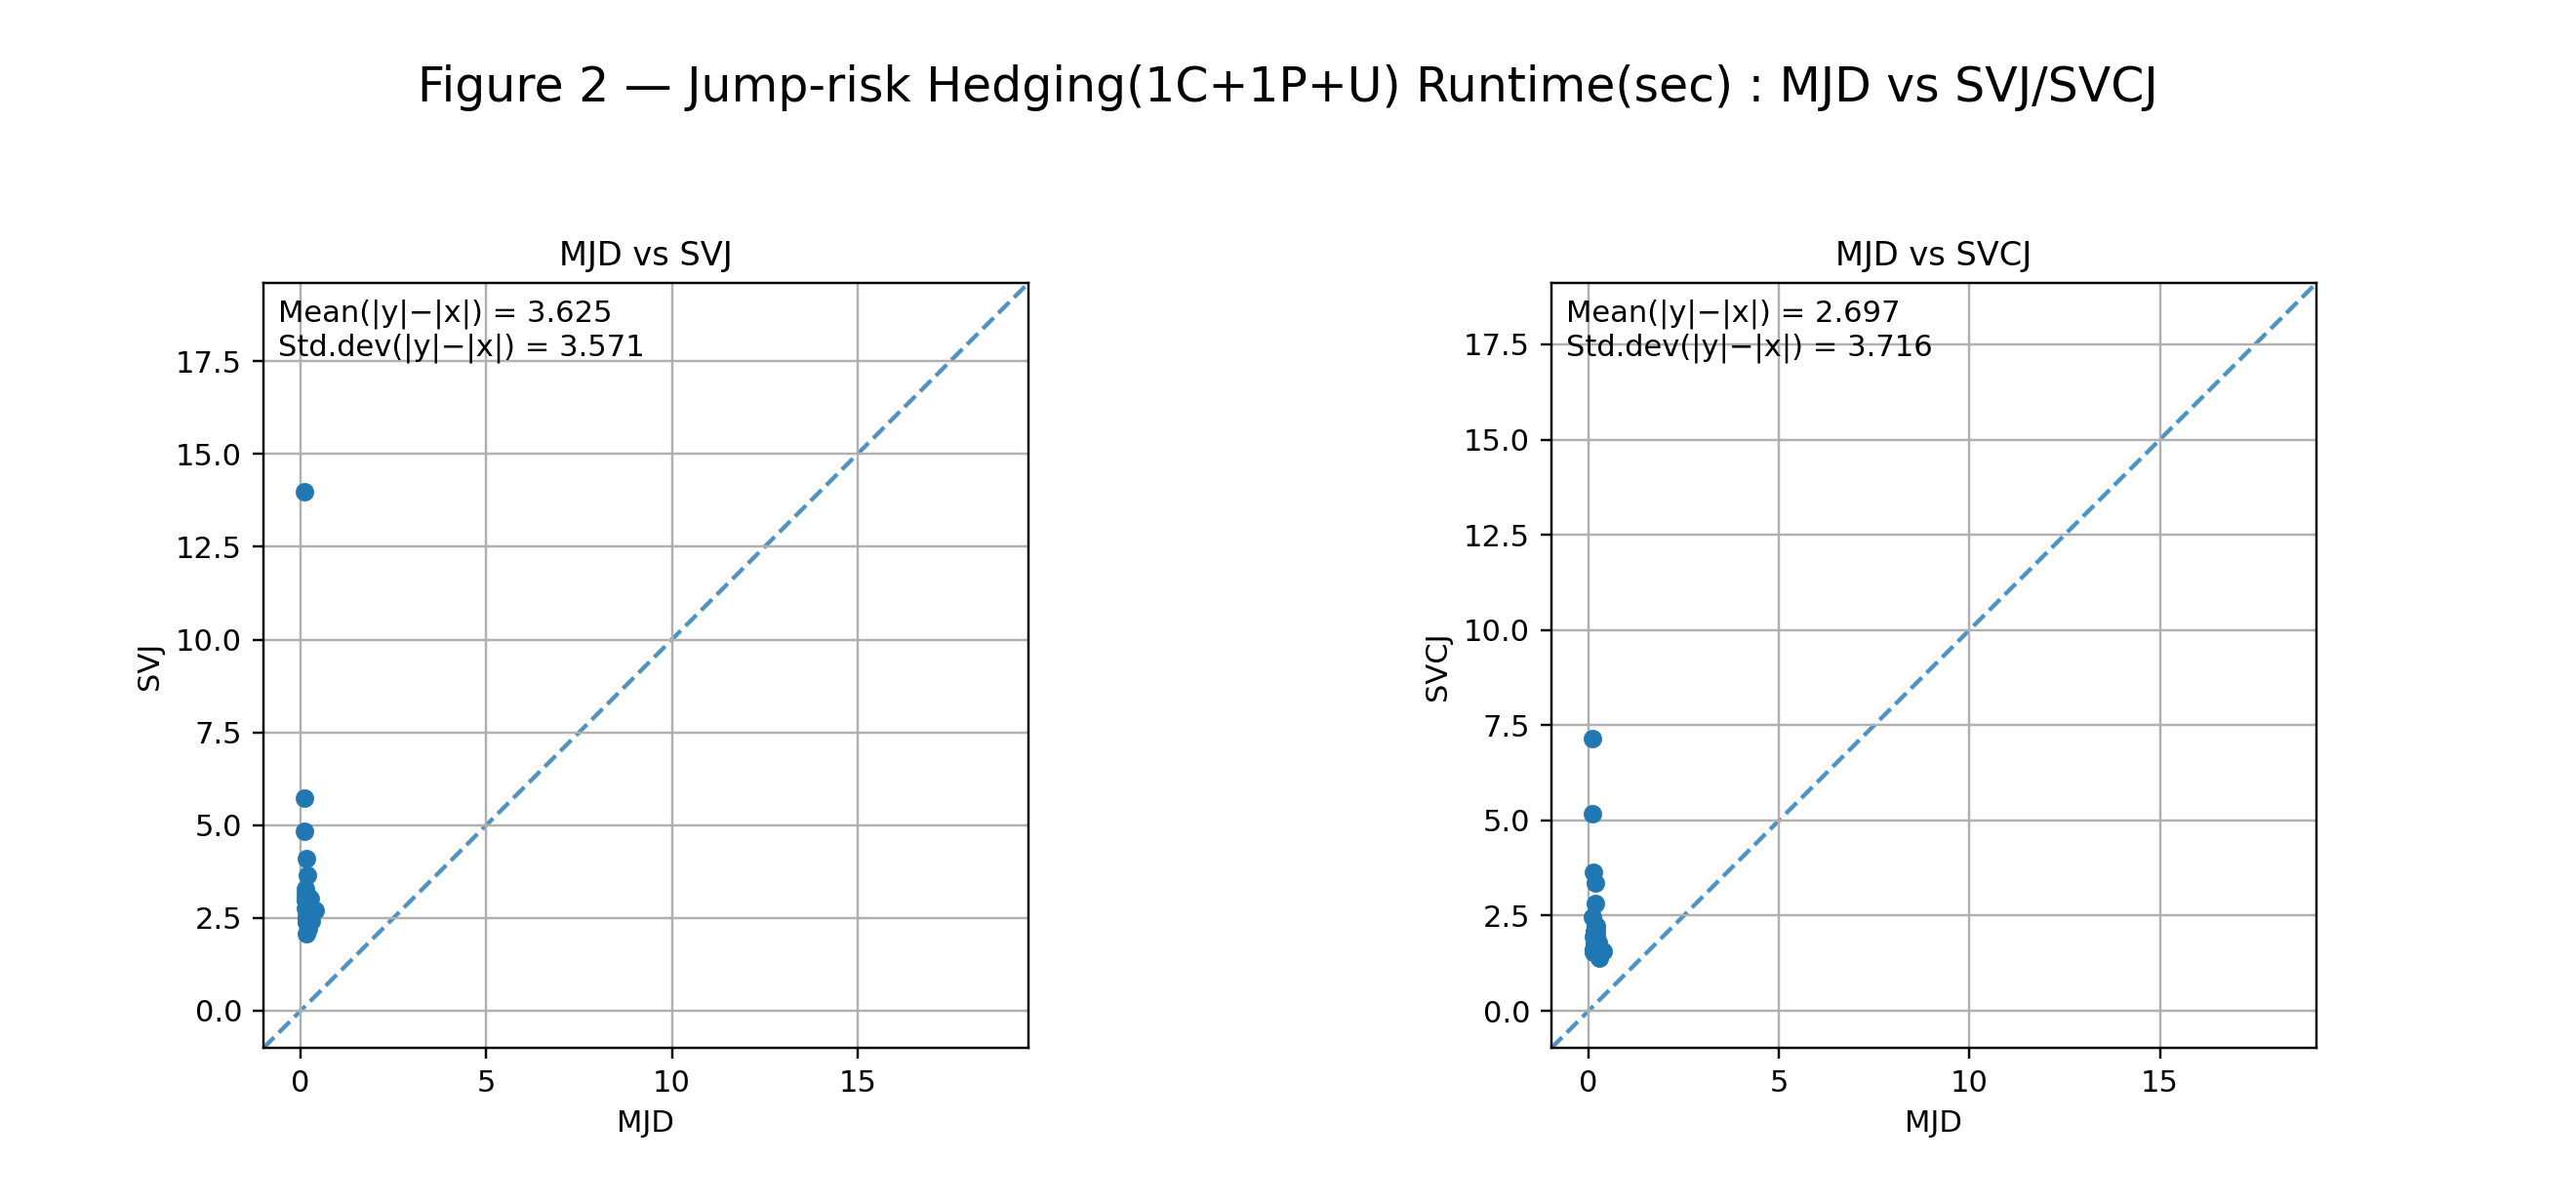
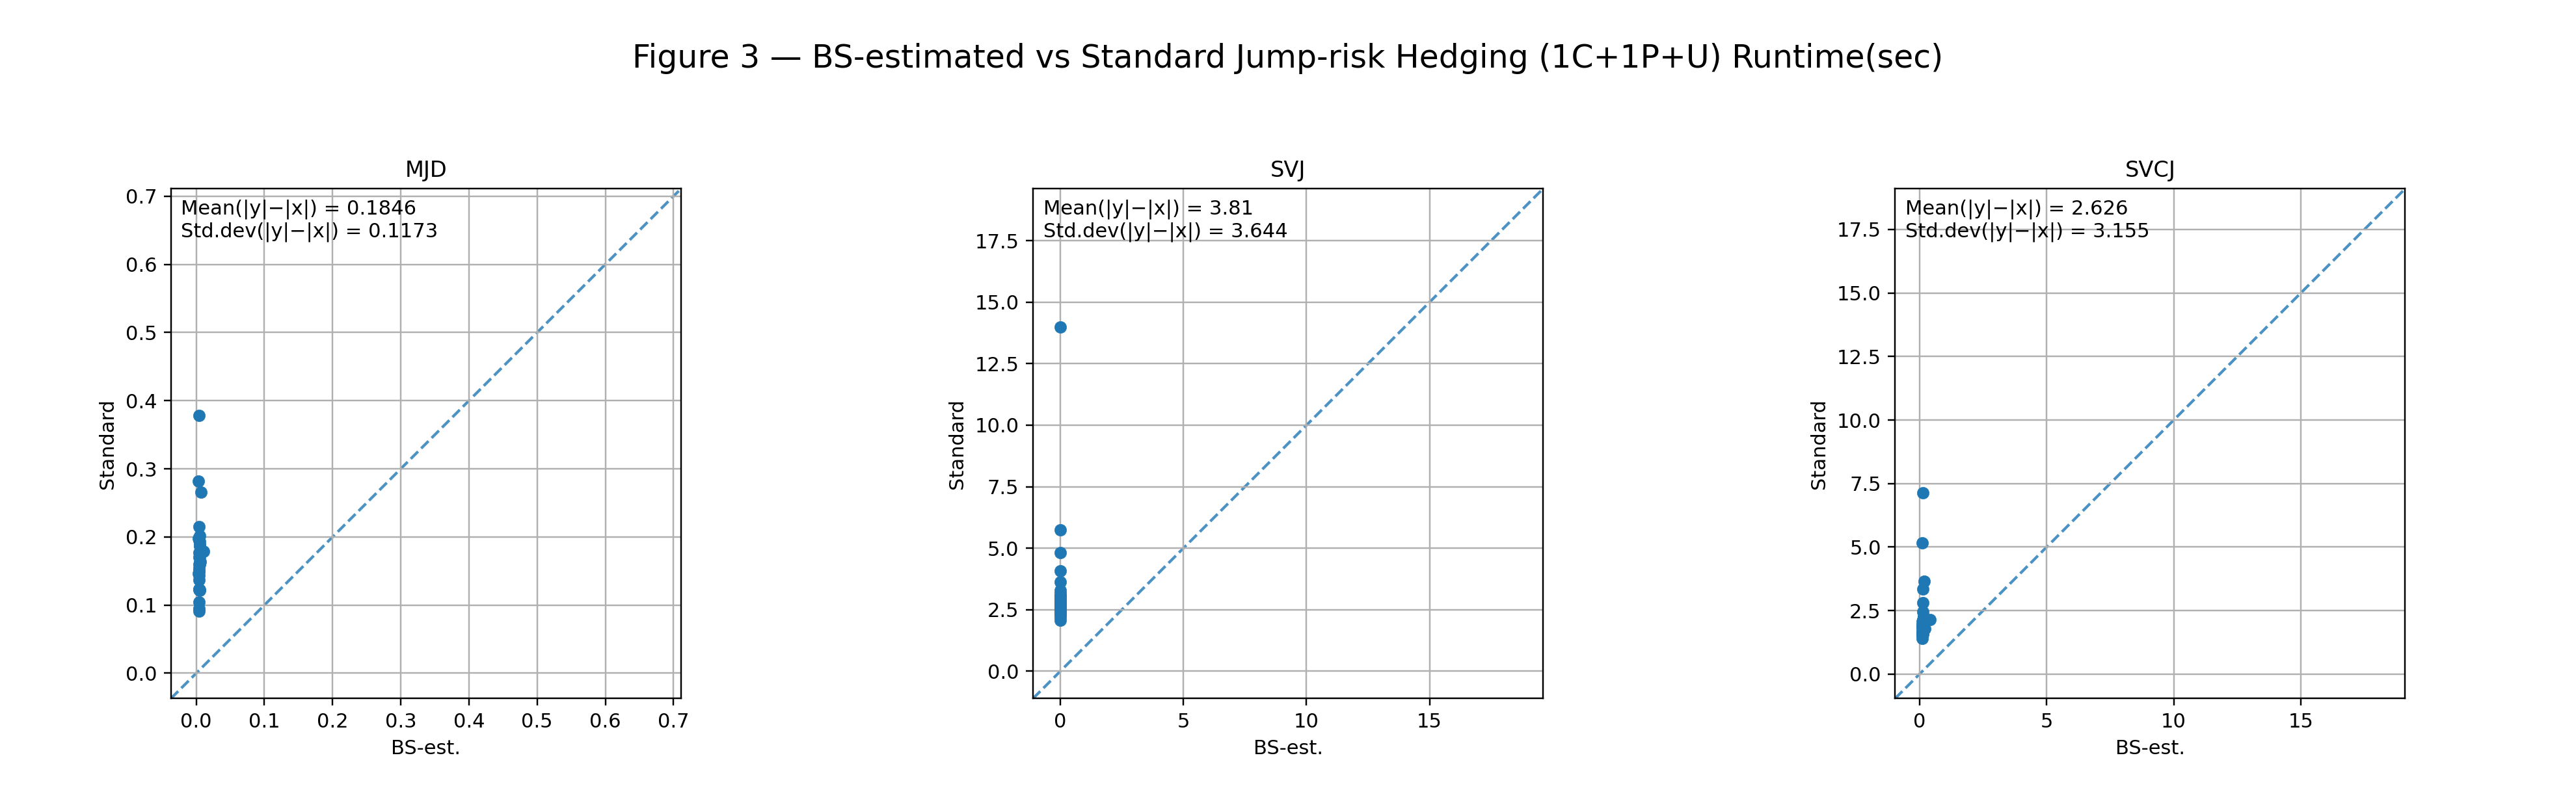
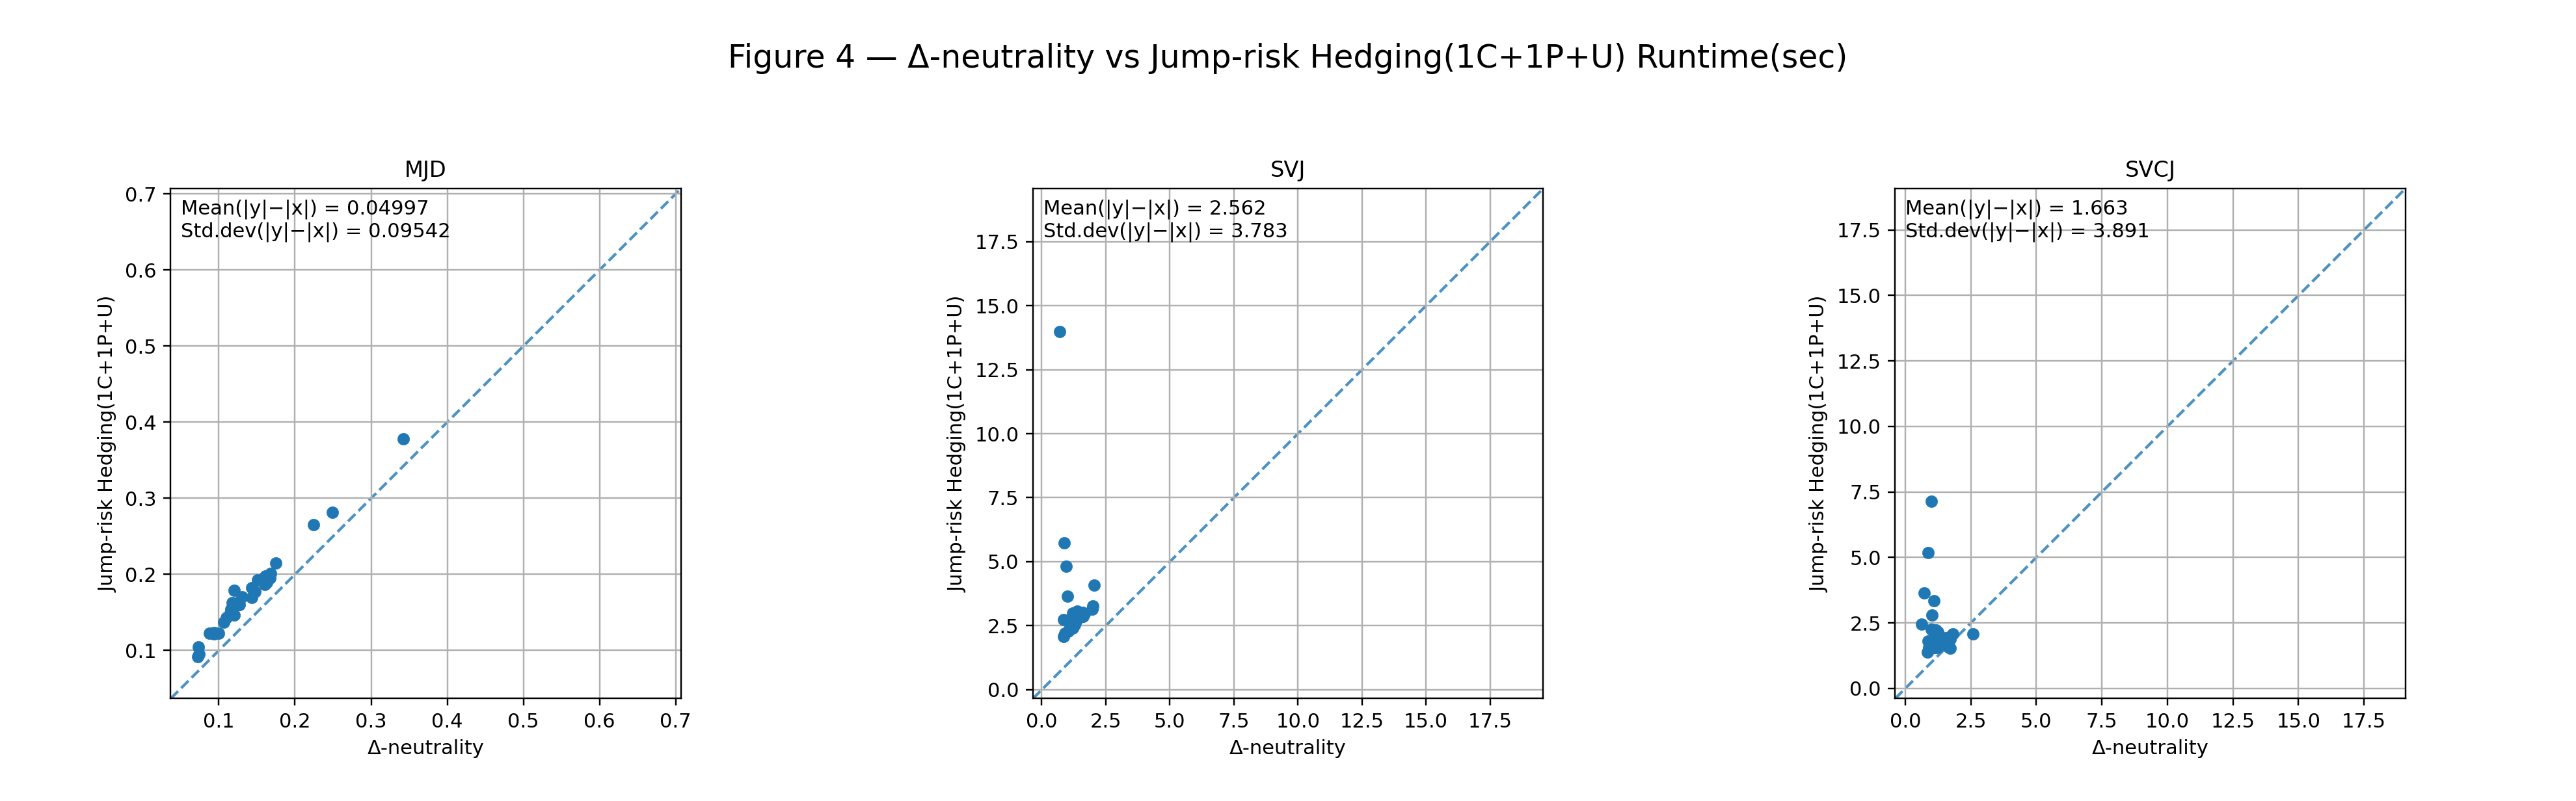
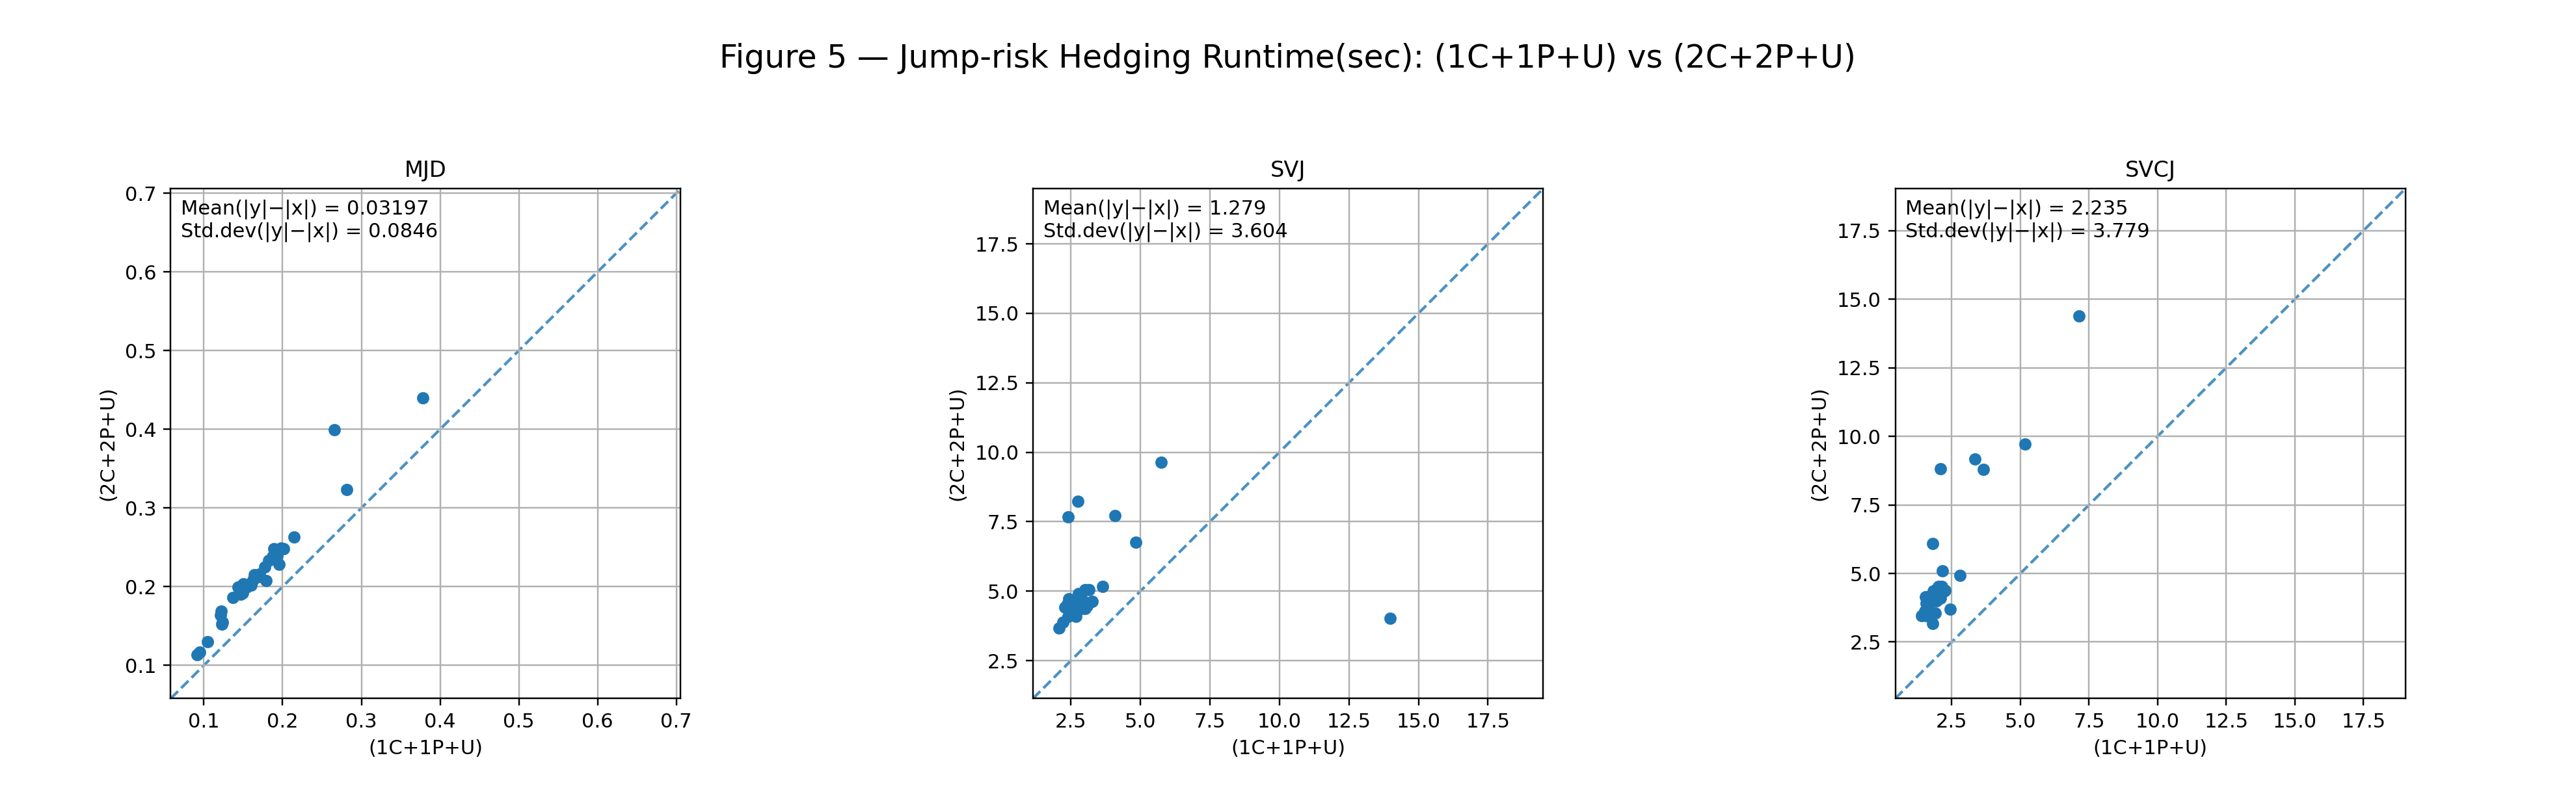

## 1) Δ-neutral (no options in the hedge)

- **MJD vs BS**  
  - Avg abs diff ≈ **+0.14 s** (sd ≈ 0.056 s)  
  - Read: MJD is only marginally slower than BS.

- **SVJ vs BS**  
  - Avg abs diff ≈ **+1.254 s** (sd ≈ 0.345 s)  
  - Read: SVJ is ~1.3 s slower than BS.

- **SVCJ vs BS**  
  - Avg abs diff ≈ **+1.224 s** (sd ≈ 0.392 s)  
  - Read: SVCJ is ~1.2 s slower than BS.

**Takeaway:** For Δ-neutral rebalances, **BS is fastest**, **MJD ~ BS**, while **SVJ/SVCJ add ~1–1.3 s** per run.

---

## 2) Jump-risk Hedging (JH, 1C+1P+U) — model vs model

- **SVJ vs MJD**  
  - Avg abs diff ≈ **+3.625 s** (sd ≈ 3.571 s)  
  - Read: SVJ is notably slower than MJD under JH.

- **SVCJ vs MJD**  
  - Avg abs diff ≈ **+2.697 s** (sd ≈ 3.716 s)  
  - Read: SVCJ is slower than MJD, but typically a bit faster than SVJ.

**Takeaway:** Under JH, **MJD is the runtime winner**; **SVCJ < SVJ** on time.

---

## 3) JH implementation choice — *Standard* vs *BS-estimated*  
_Difference measured as **Standard − BS-estimated** (positive = Standard slower)._

- **MJD:** **+0.185 s** (sd ≈ 0.117 s) → **BS-estimated faster** (small win).  
- **SVJ:** **+3.810 s** (sd ≈ 3.645 s) → **BS-estimated much faster**.  
- **SVCJ:** **+2.626 s** (sd ≈ 3.155 s) → **BS-estimated clearly faster**.

**Takeaway:** If you care about latency, prefer **BS-estimated** JH, especially for **SVJ/SVCJ**.

---

## 4) Δ-neutral vs JH (1C+1P+U) — same model  
_Difference measured as **JH − Δ-neutral** (positive = JH slower)._

- **MJD:** **+0.050 s** (sd ≈ 0.096 s) → extra cost is negligible.  
- **SVJ:** **+2.562 s** (sd ≈ 3.783 s) → meaningful overhead.  
- **SVCJ:** **+1.663 s** (sd ≈ 3.891 s) → meaningful overhead.

**Takeaway:** JH adds **little** runtime for **MJD**, but **1.5–2.5 s** for **SVJ/SVCJ**.

---

## 5) Capacity: (2C+2P+U) vs (1C+1P+U)  
_Difference measured as **(2C+2P+U) − (1C+1P+U)** (positive = larger hedge slower)._

- **MJD:** **+0.032 s** (sd ≈ 0.085 s) → essentially free to scale.  
- **SVJ:** **+1.279 s** (sd ≈ 3.605 s) → noticeable extra cost.  
- **SVCJ:** **+2.235 s** (sd ≈ 3.779 s) → largest overhead.

**Takeaway:** Scaling instrument count **barely affects MJD** runtime; it **hurts SVJ/SVCJ**, especially **SVCJ**.

---

### Bottom line (runtime)
- **Fastest stack:** BS baseline; for models, **MJD** is consistently the quickest.  
- **Costly models:** **SVJ** and **SVCJ** comparably slow; both add ~1–3 s depending on task.  
- **Implementation matters:** Use **BS-estimated JH** to cut runtime (big wins for SVJ/SVCJ).  
- **Capacity scaling:** **1C+1P+U is the sweet spot**; moving to **2C+2P+U** is cheap for MJD, expensive for SVJ/SVCJ.


# Hedging **weights** — 5-day rebalance (interpretation only)

All comments summarize the **means (μ)** and **std. devs (σ)** printed on the plots.

---
## Figures

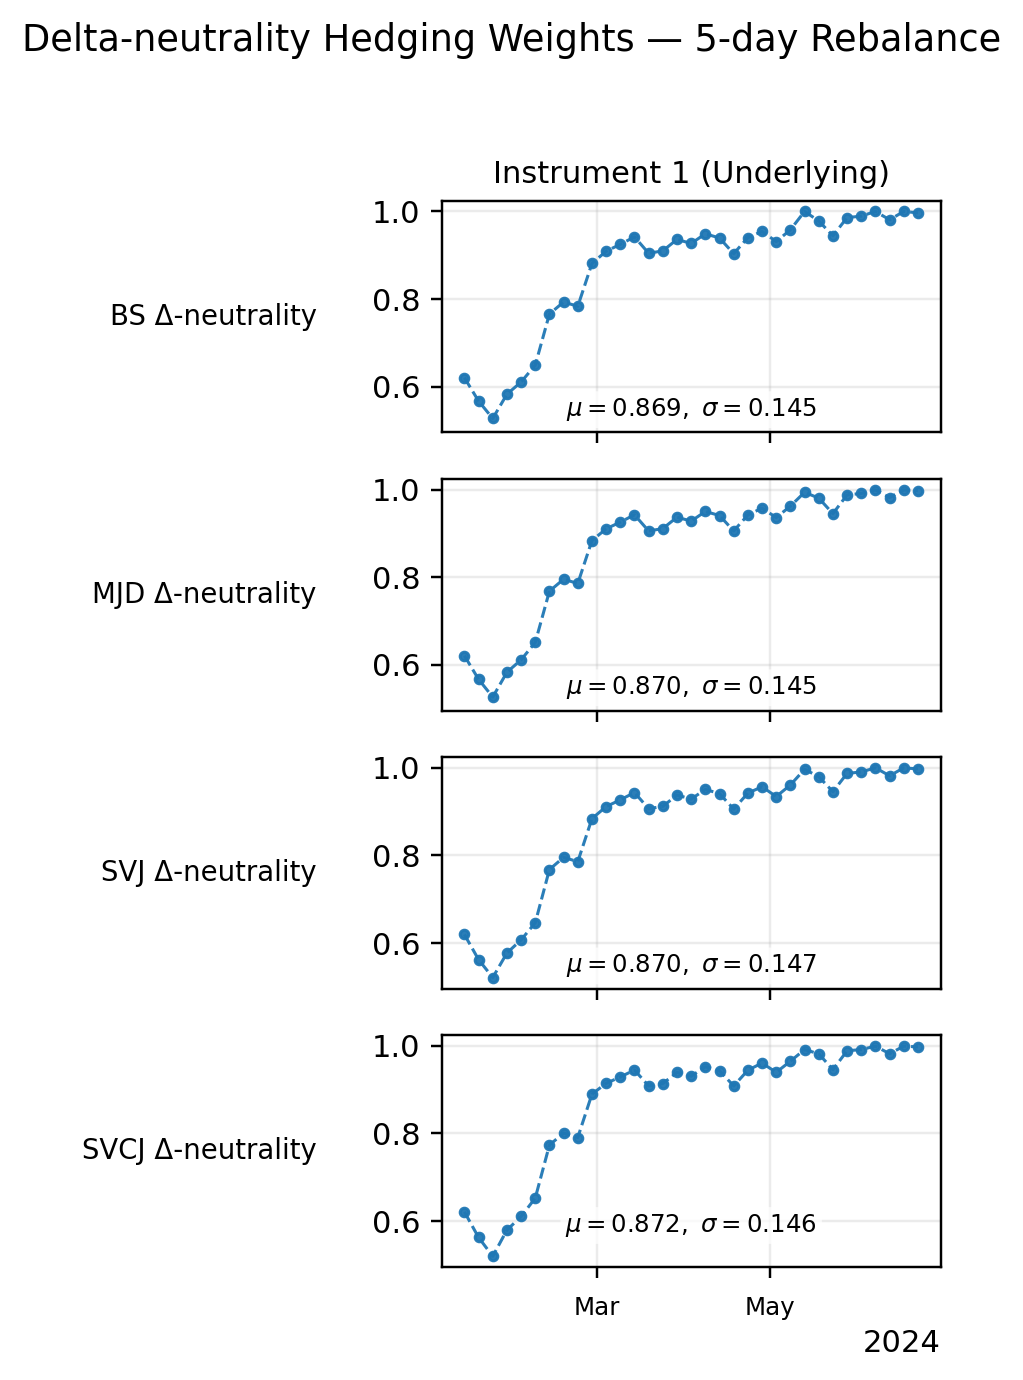
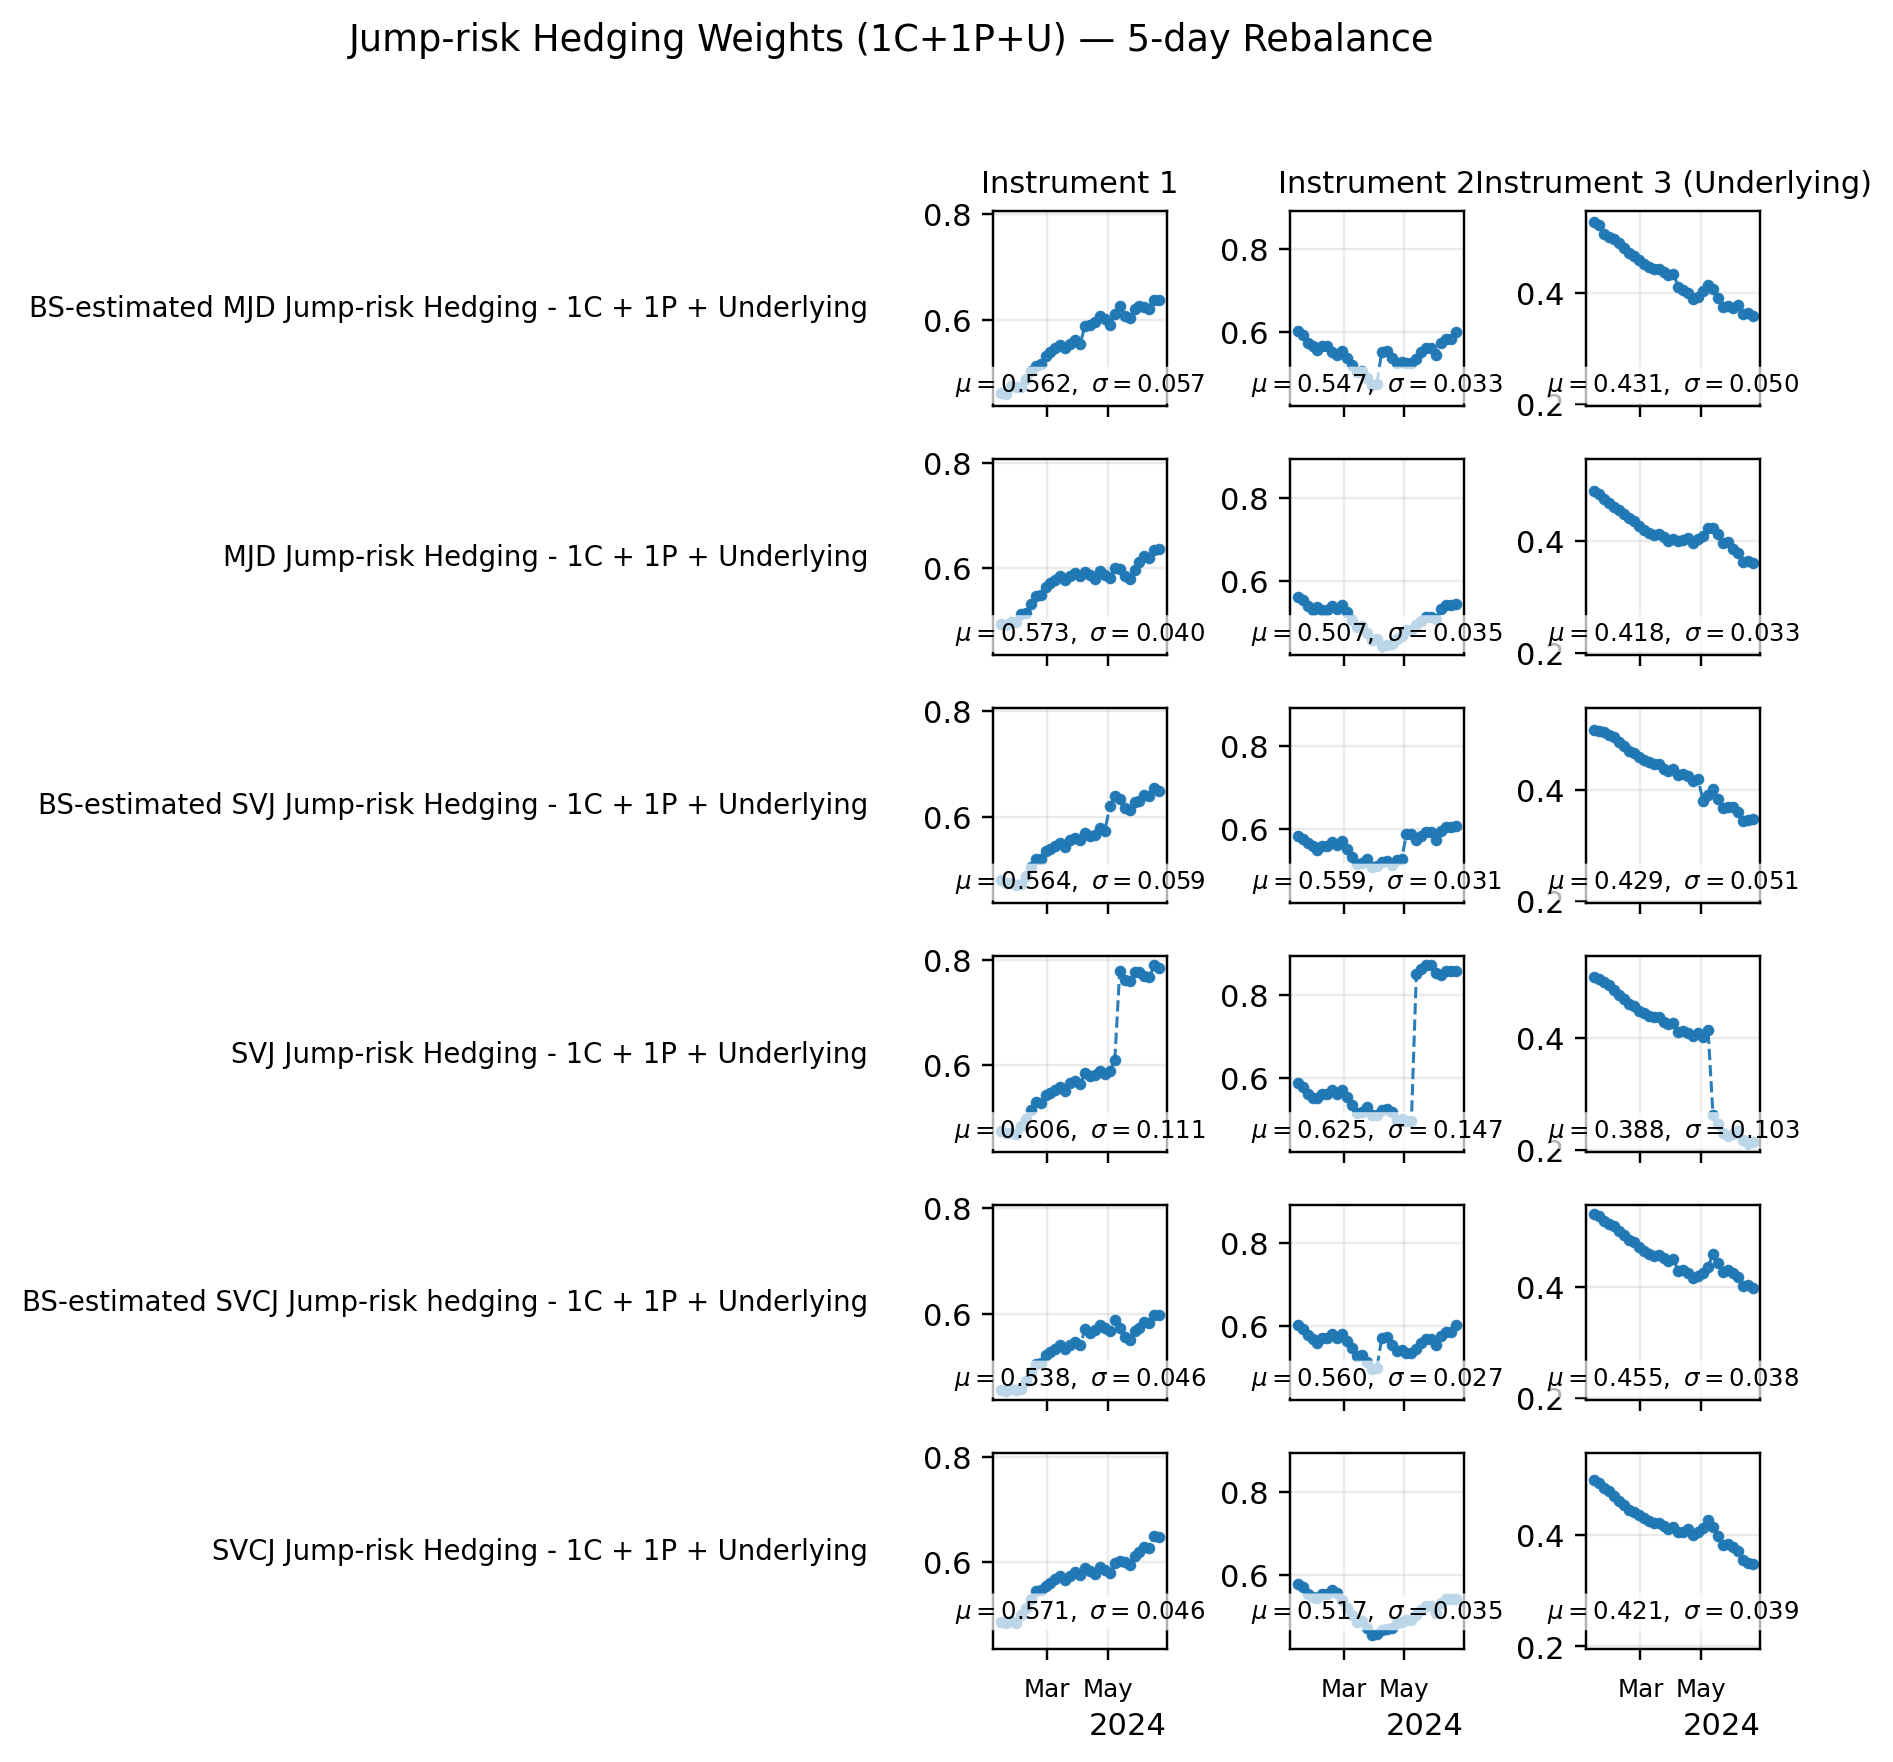
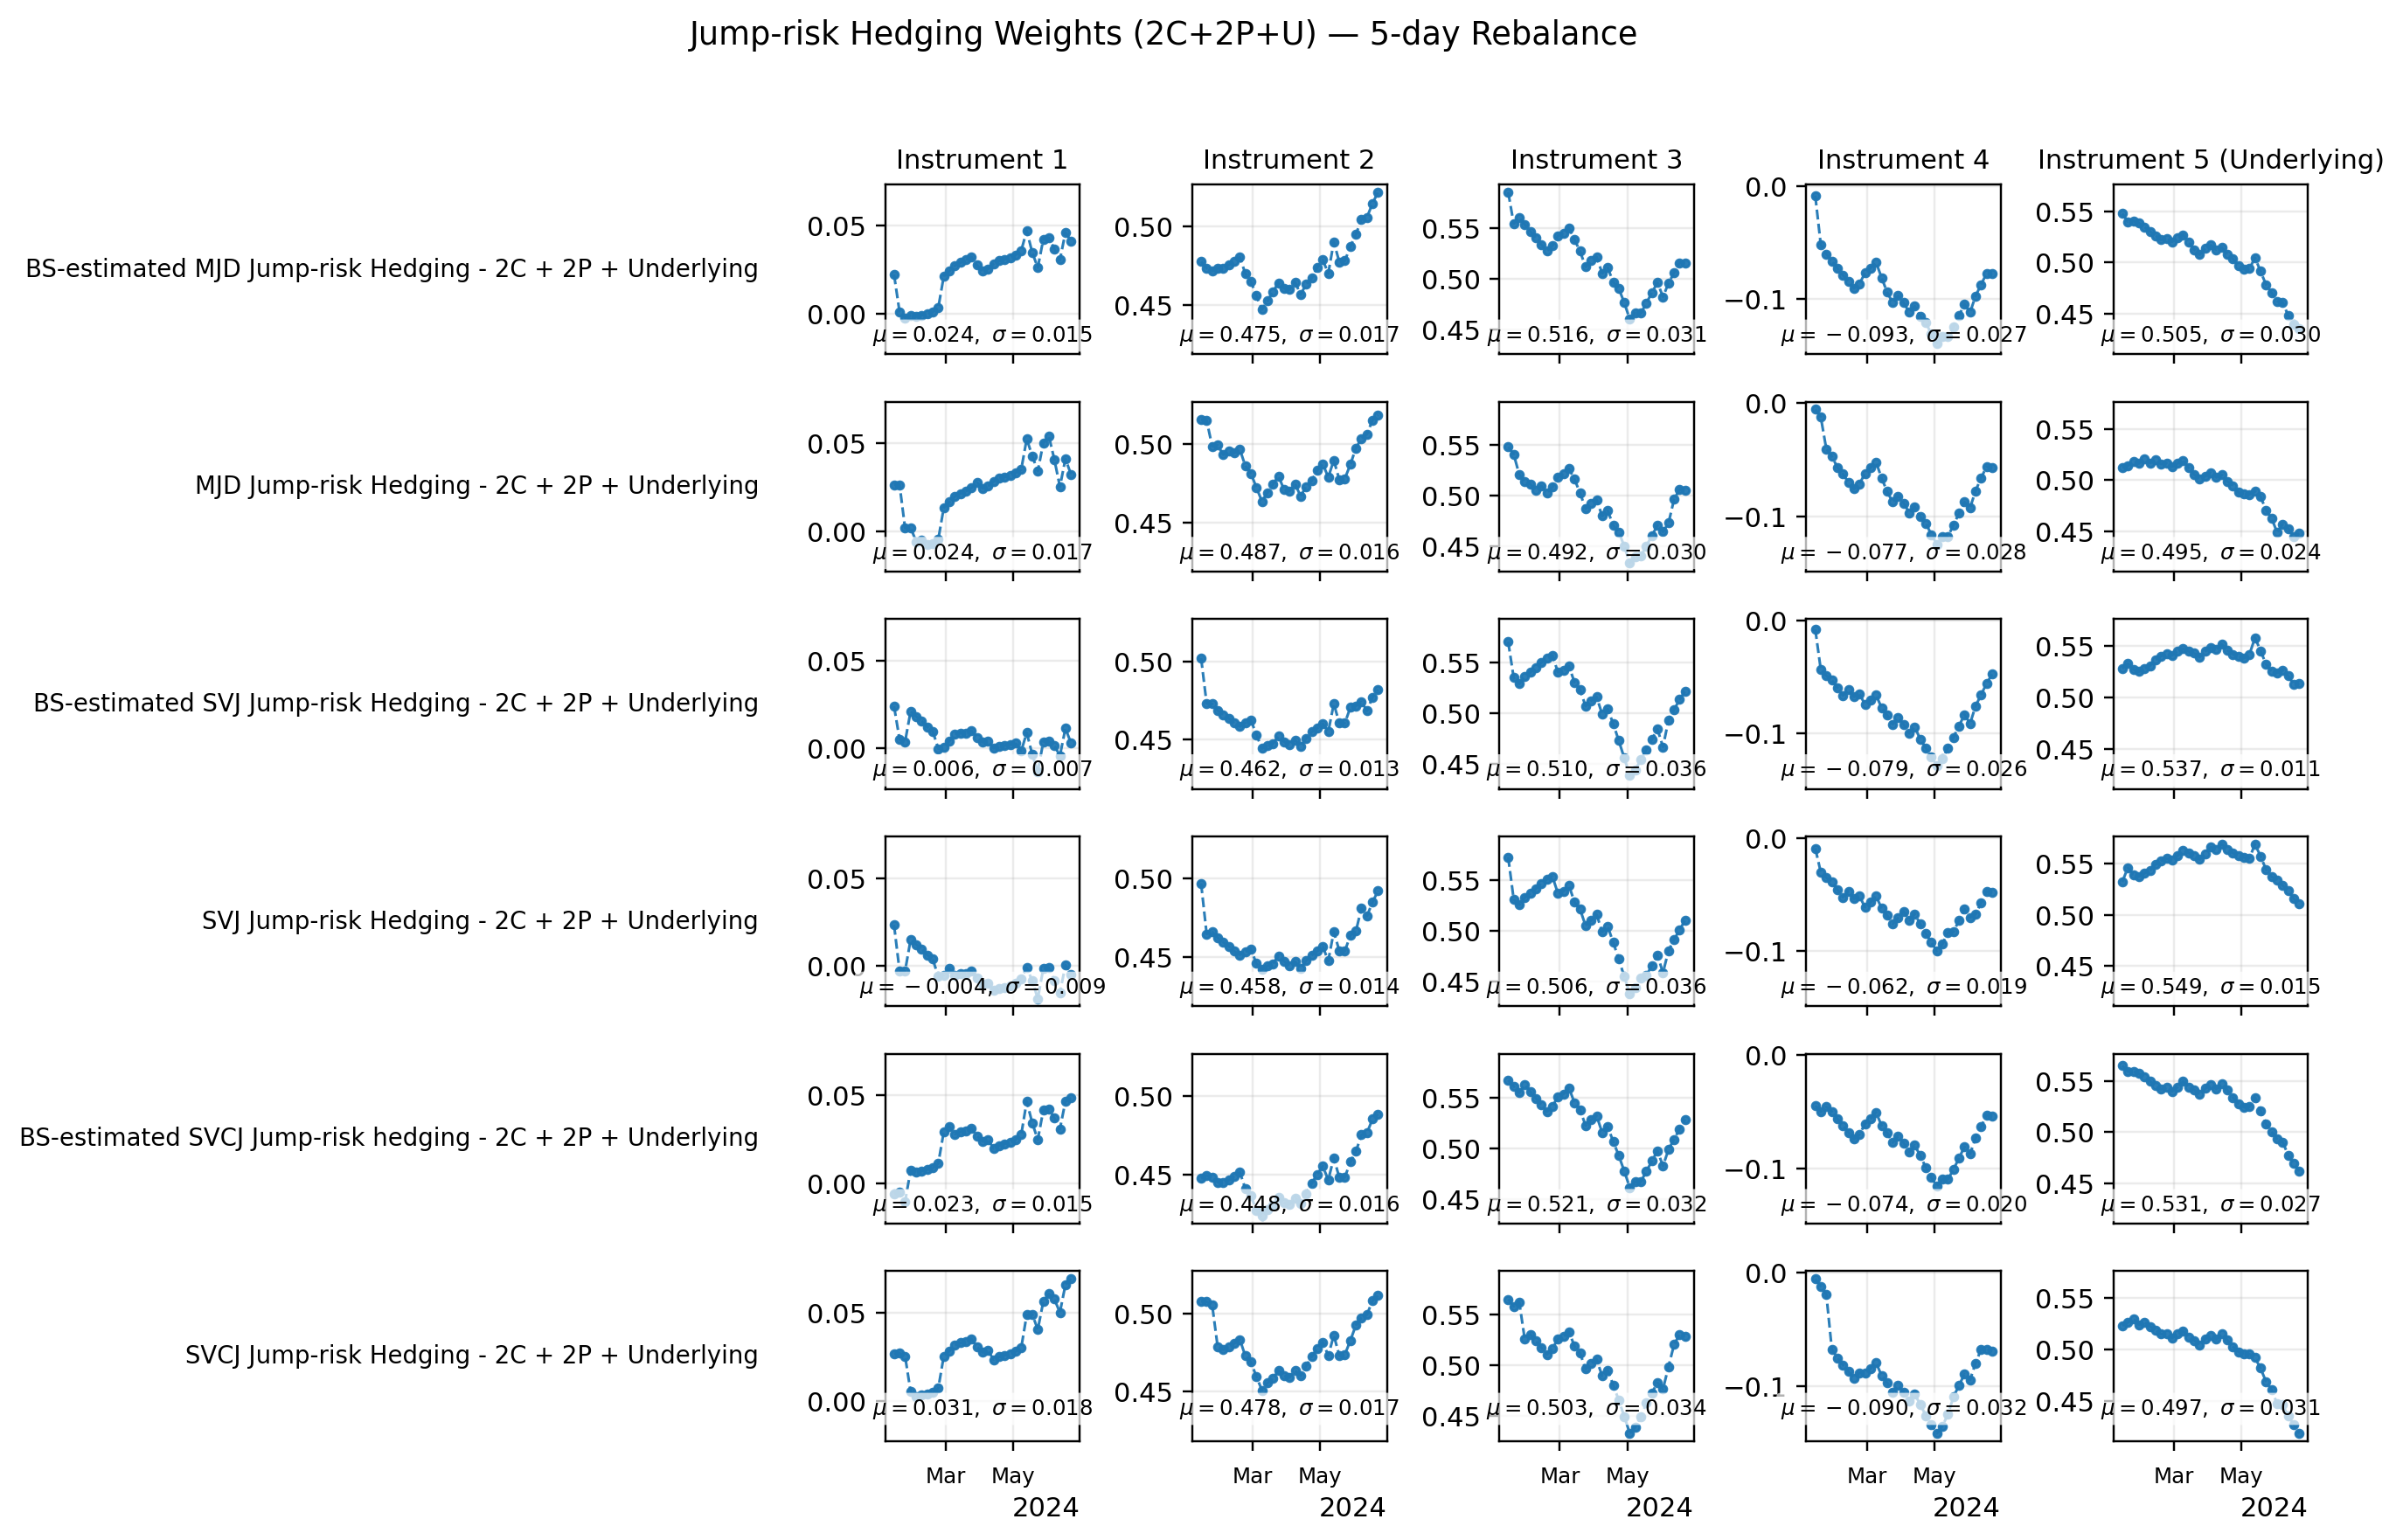

## 1) Δ-neutral (no options)

- Underlying weight (BS/MJD/SVJ/SVCJ): **μ ≈ 0.869–0.872**, **σ ≈ 0.145–0.147**.  
  Time path: starts ~0.55–0.60 and trends up, stabilizing near **1.0**.

**Takeaway:** Δ-neutral is **model-insensitive** and **underlying-heavy** (≈87% on average) with moderate variability.

---

## 2) Jump-risk Hedging — **1C + 1P + U**

**Instrument 1 (Call):** **μ 0.538–0.606**, **σ 0.040–0.111**  
**Instrument 2 (Put):** **μ 0.507–0.625**, **σ 0.027–0.147**  
**Instrument 3 (Underlying):** **μ 0.388–0.455**, **σ 0.033–0.103**

**Takeaway:** Risk shifts from the underlying (**~0.39–0.46**) to the options (**~0.54–0.62** each).  
SVJ (standard) shows the **largest and most volatile** option weights; **BS-estimated** variants are **smoother**.

---

## 3) Jump-risk Hedging — **2C + 2P + U**

**Instrument 1 (wing option):** **μ −0.004 → +0.031**, **σ ≤ 0.018**  
**Instrument 2 (near-the-money):** **μ 0.448–0.487**, **σ 0.013–0.017**  
**Instrument 3 (near-the-money):** **μ 0.492–0.521**, **σ 0.030–0.036**  
**Instrument 4 (wing option, short):** **μ −0.093 → −0.062**, **σ 0.019–0.032**  
**Instrument 5 (Underlying):** **μ 0.495–0.549**, **σ 0.011–0.031**

**Takeaway:** Extra capacity **spreads** the hedge. The **two central options** and the **underlying (~0.50)** carry most of the weight; **wing options are small** (one slightly short). BS-estimated implementations are **slightly steadier**.

---

### Bottom line
- **Δ-neutral:** simple, stable, and nearly **model-independent** (μ ≈ 0.87 on the underlying).  
- **1C+1P+U:** reallocates to options; **SVJ** is most aggressive/variable; **BS-est** damps volatility.  
- **2C+2P+U:** emphasizes **near-the-money options + underlying**, with **minimal wing usage** across models.


# Hypothesis Tests — Weekly Absolute Hedging Error ($)

_All tests use n = 33 weekly observations; df = 32.  
Differences are **mean(|y| − |x|)** with **y named first**.  
Left-tailed Ha: **mean(|y| − |x|) < 0** (i.e., **y has lower error**).  
For compactness we show the **mean difference (μΔ)**, its **std. dev. (sΔ)**, the **t-stat**, and **p-value**._

---

## Figures
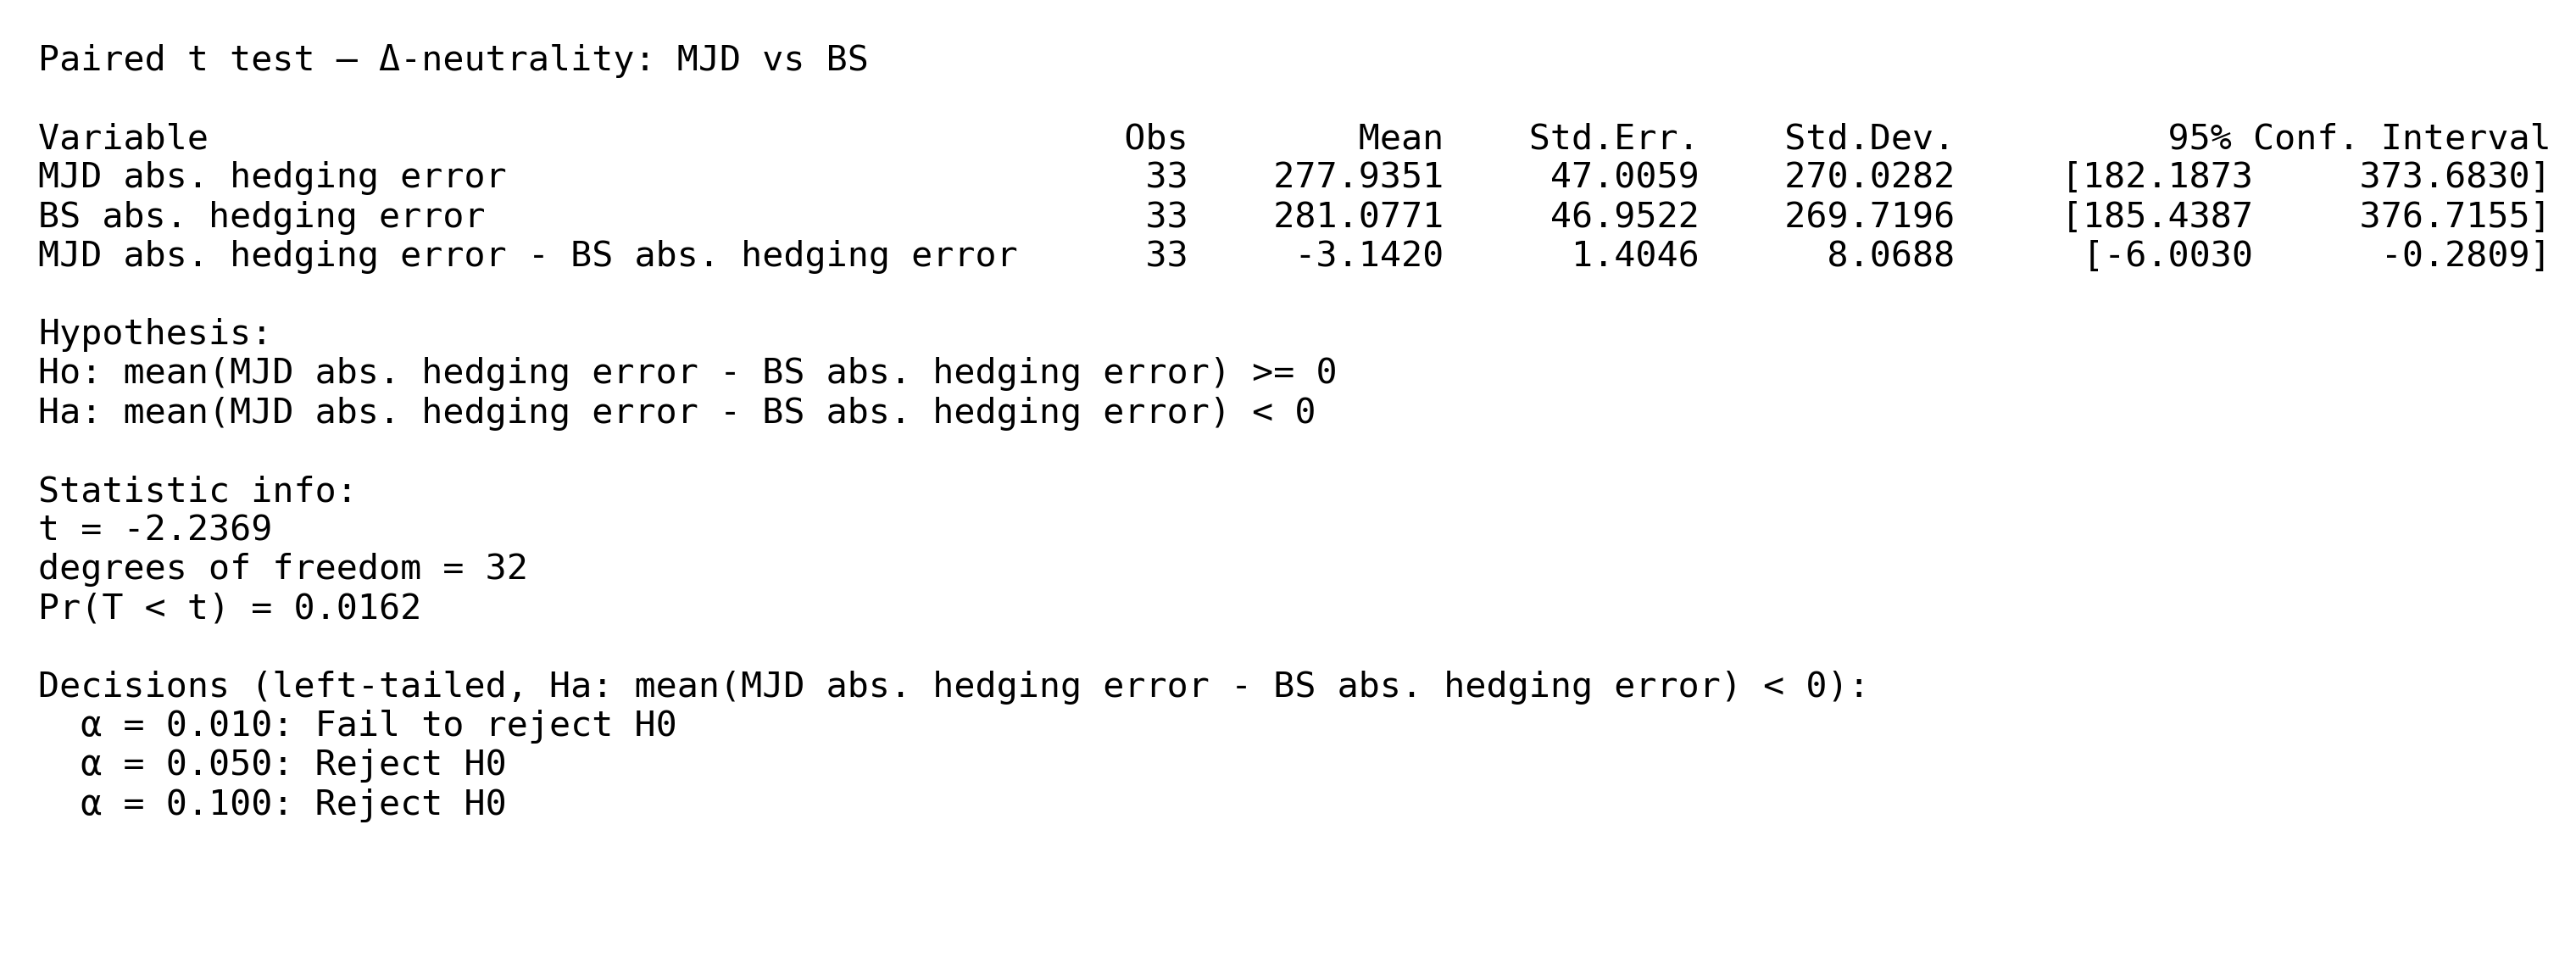
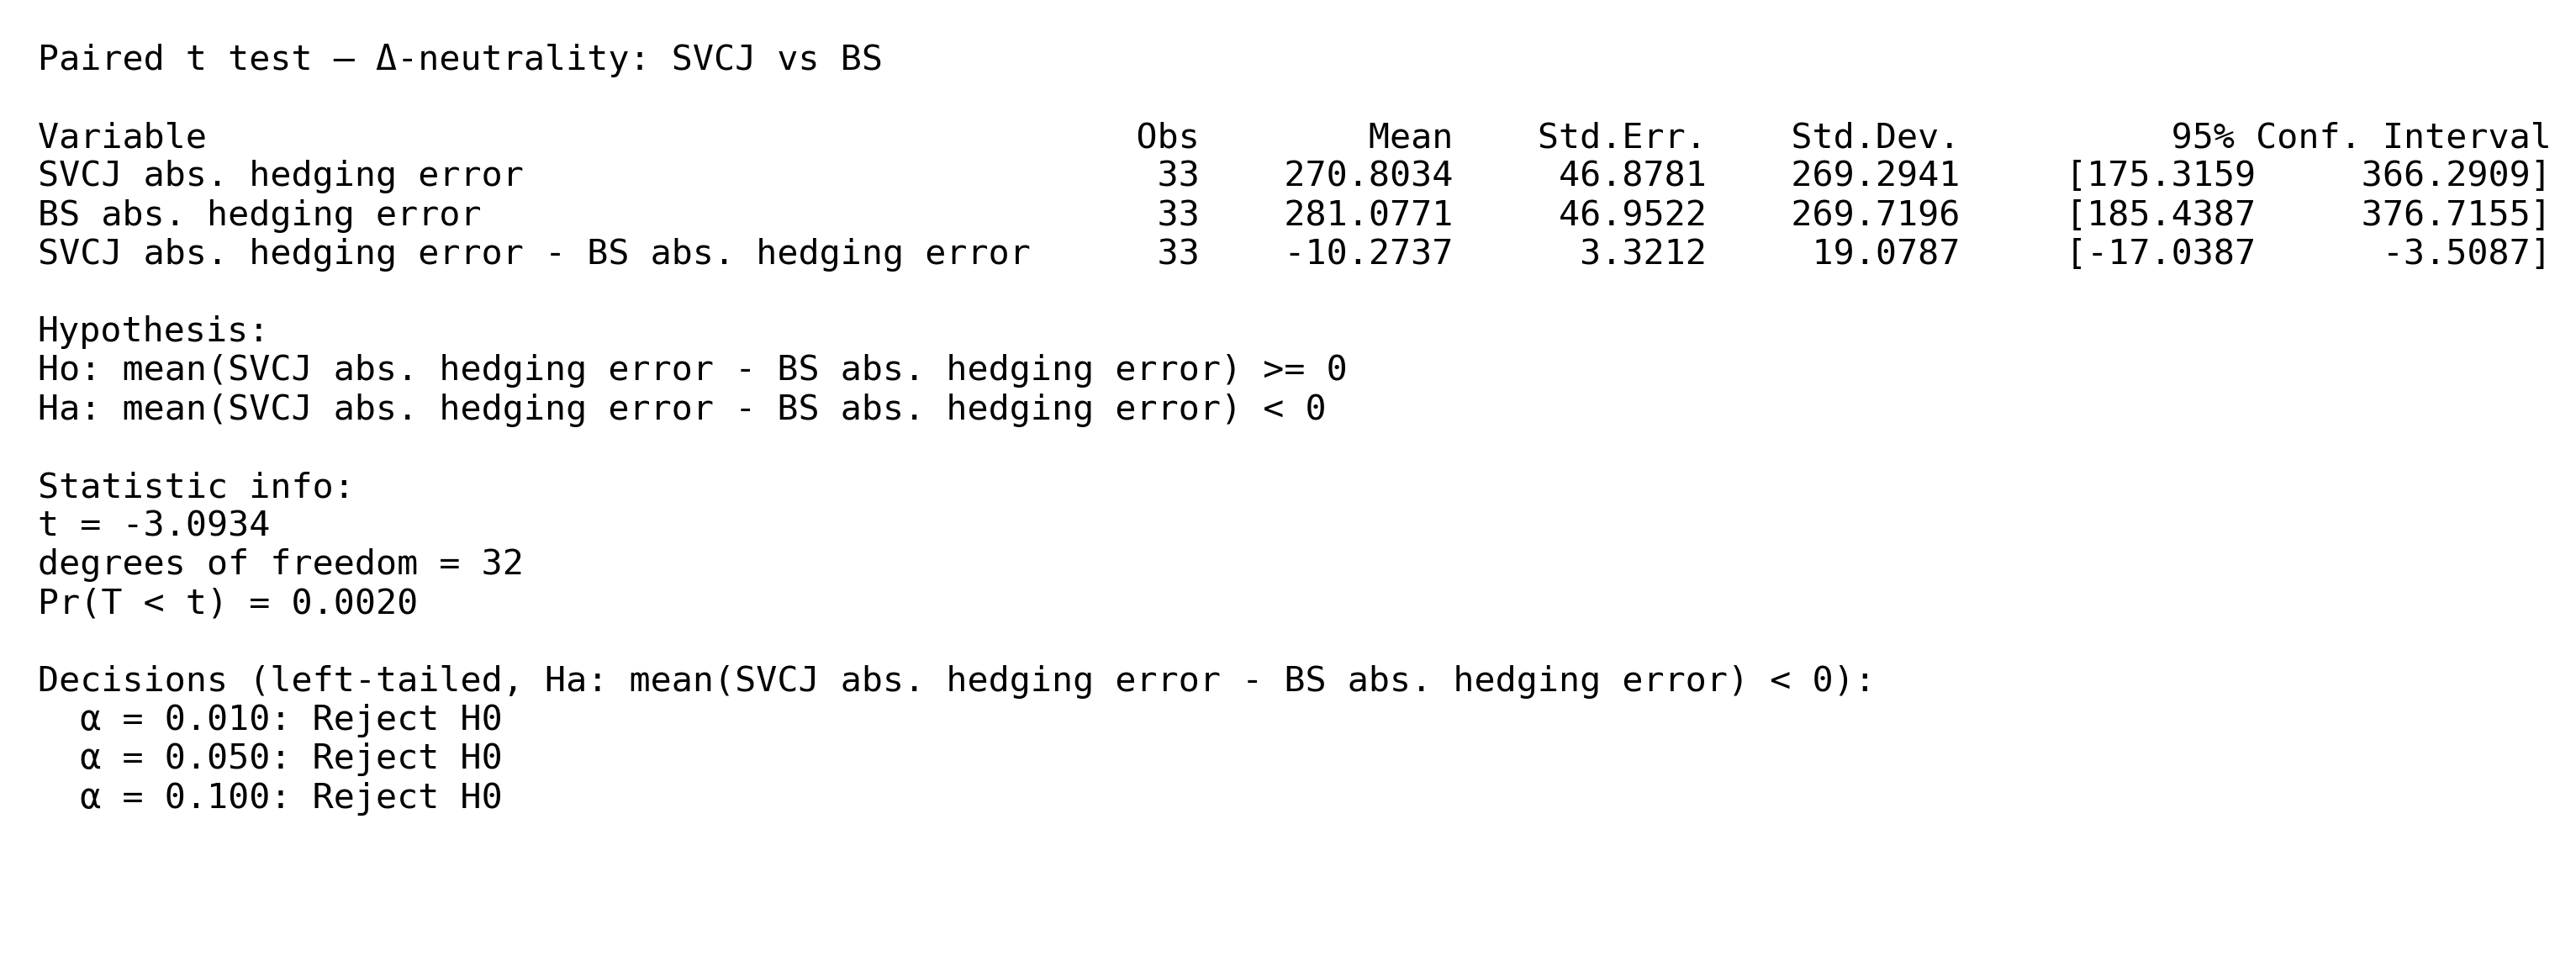
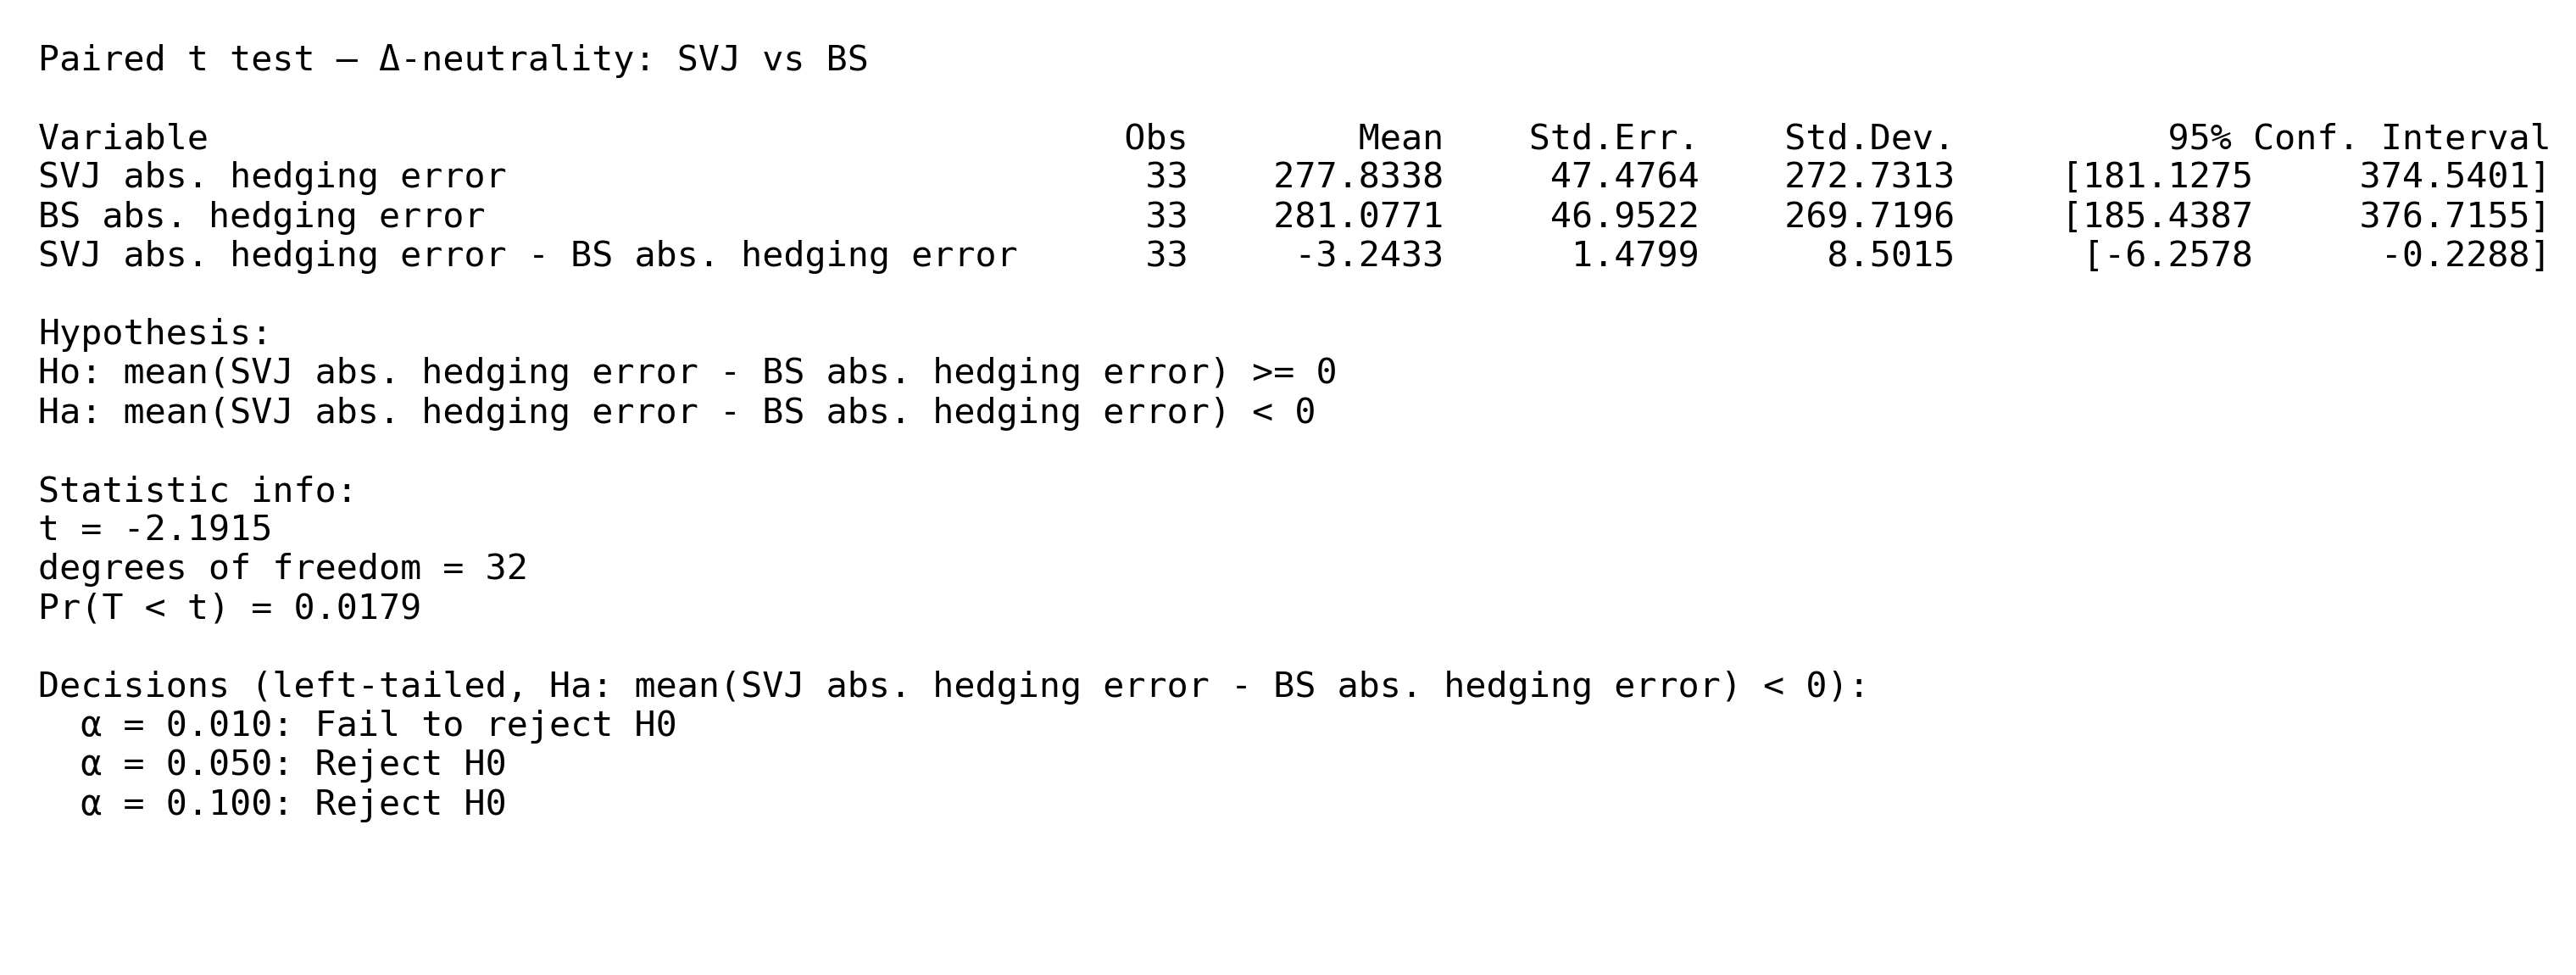
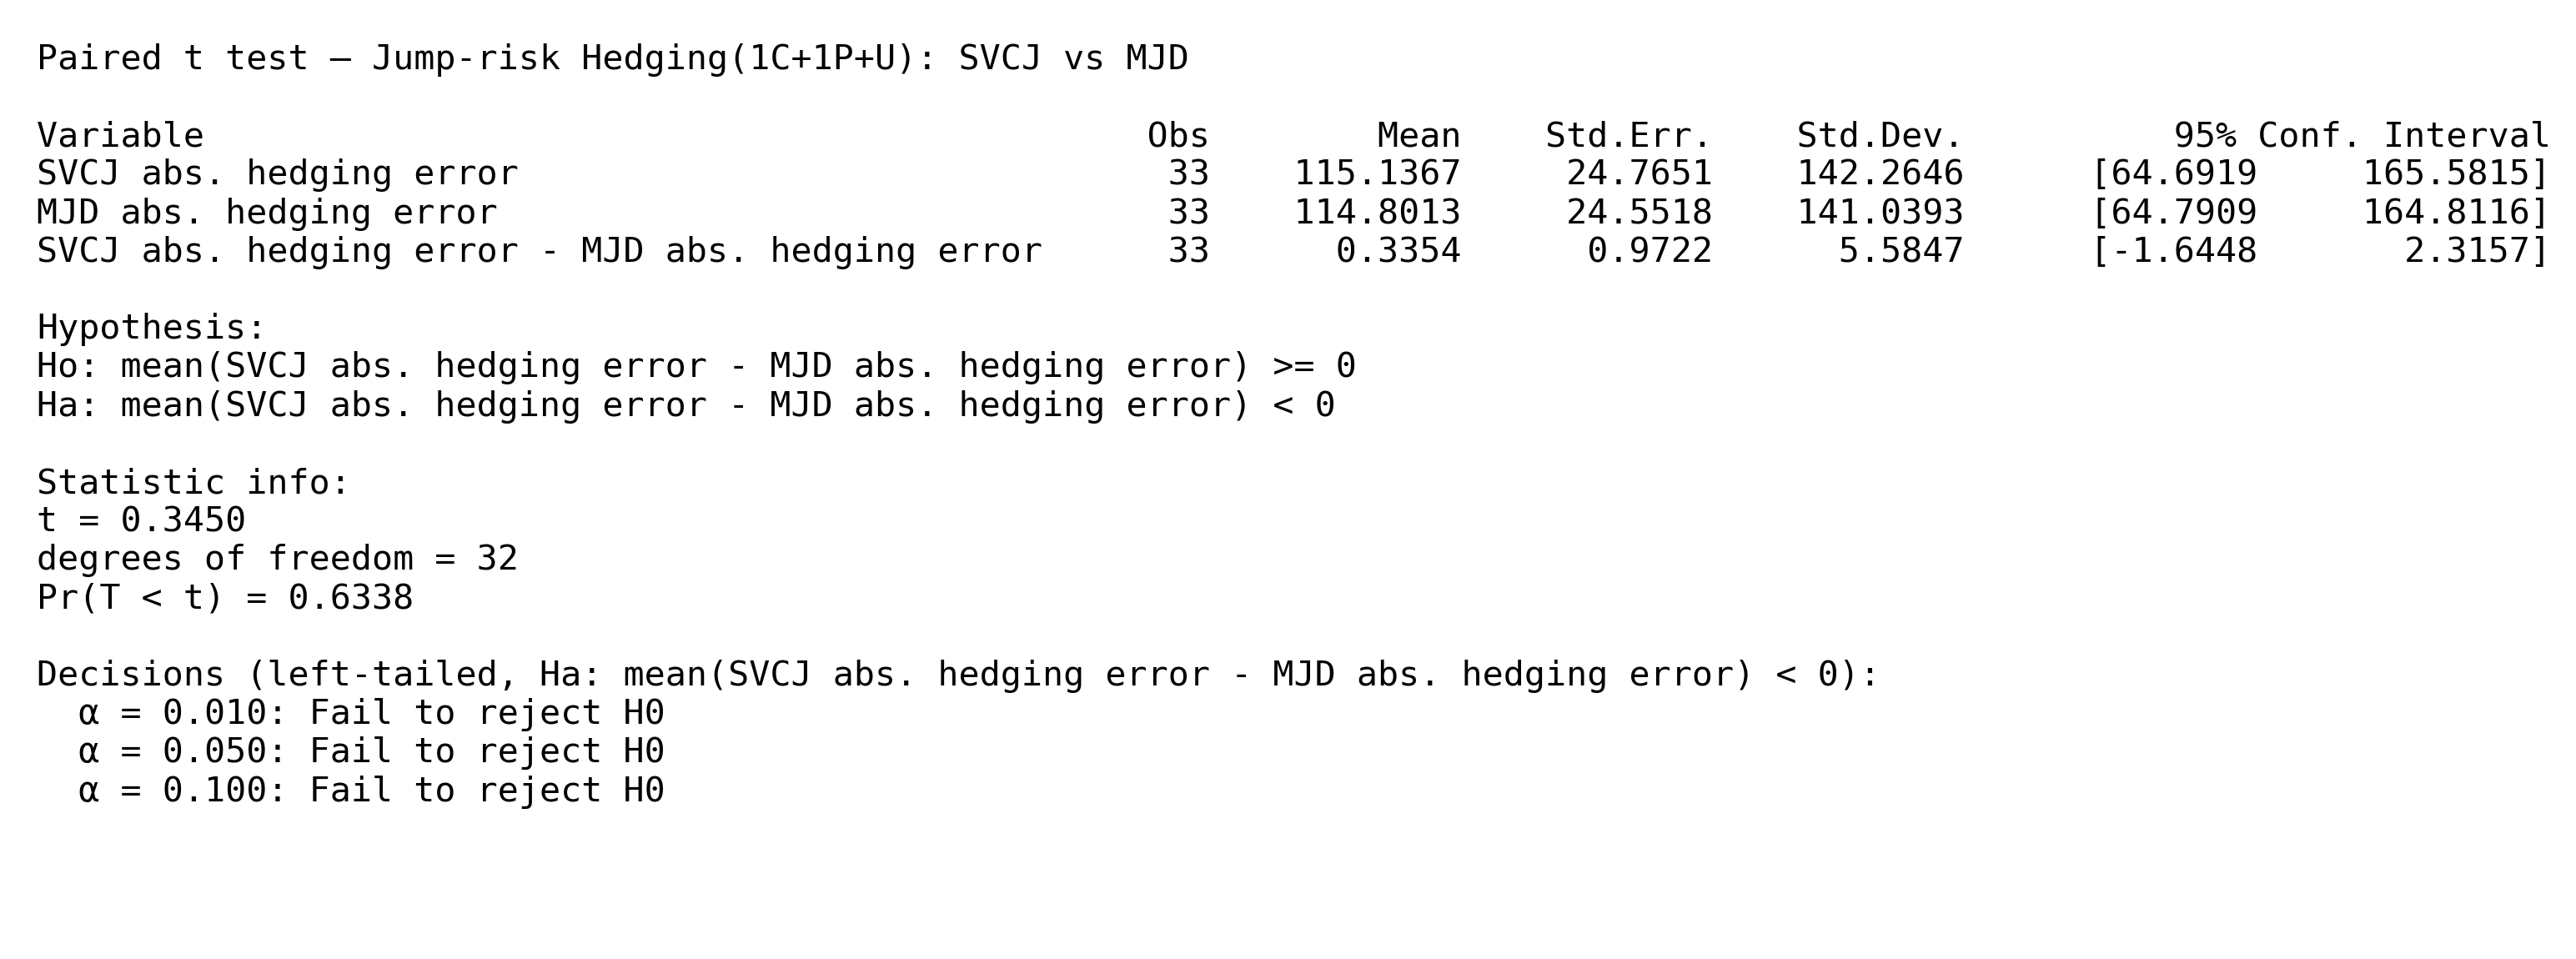
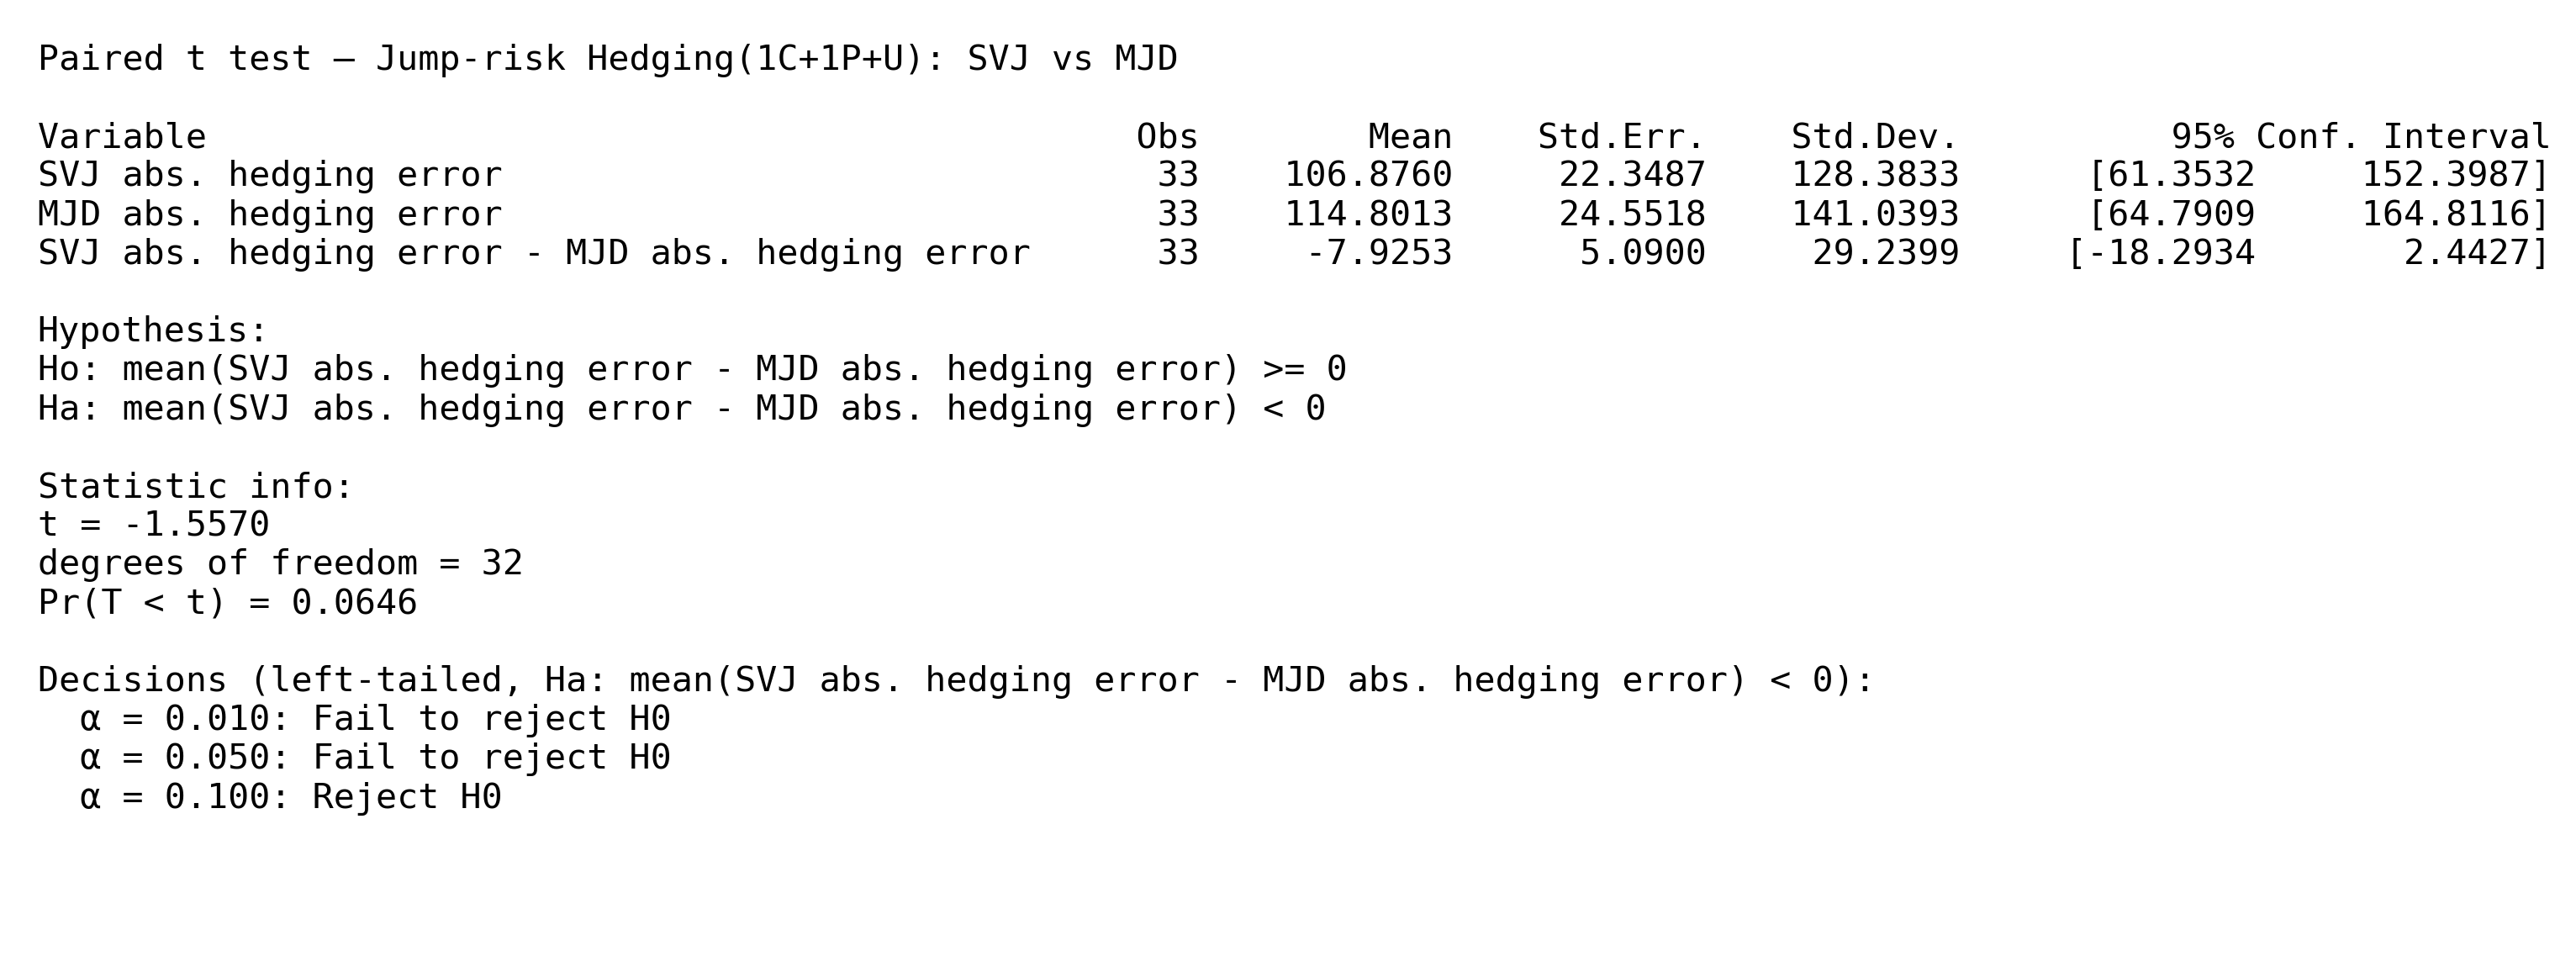
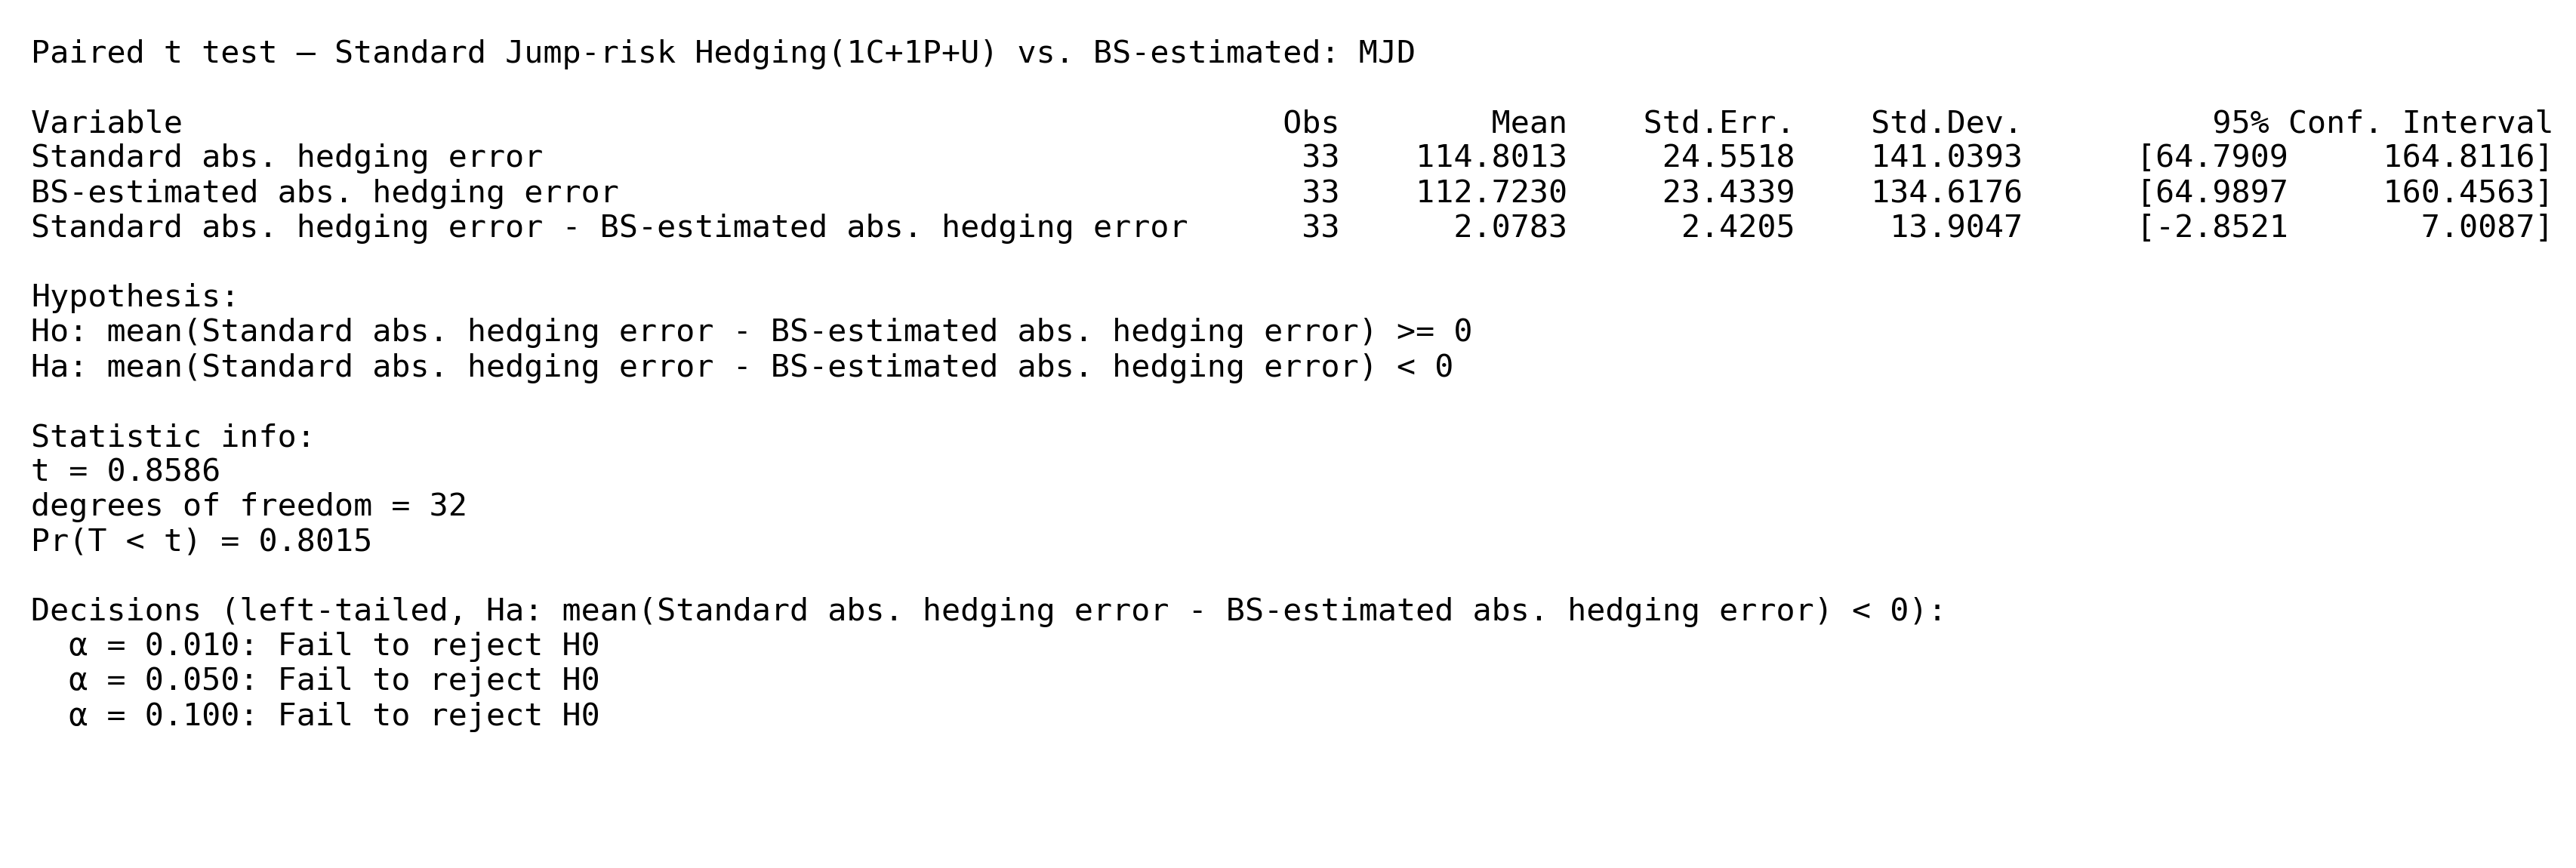
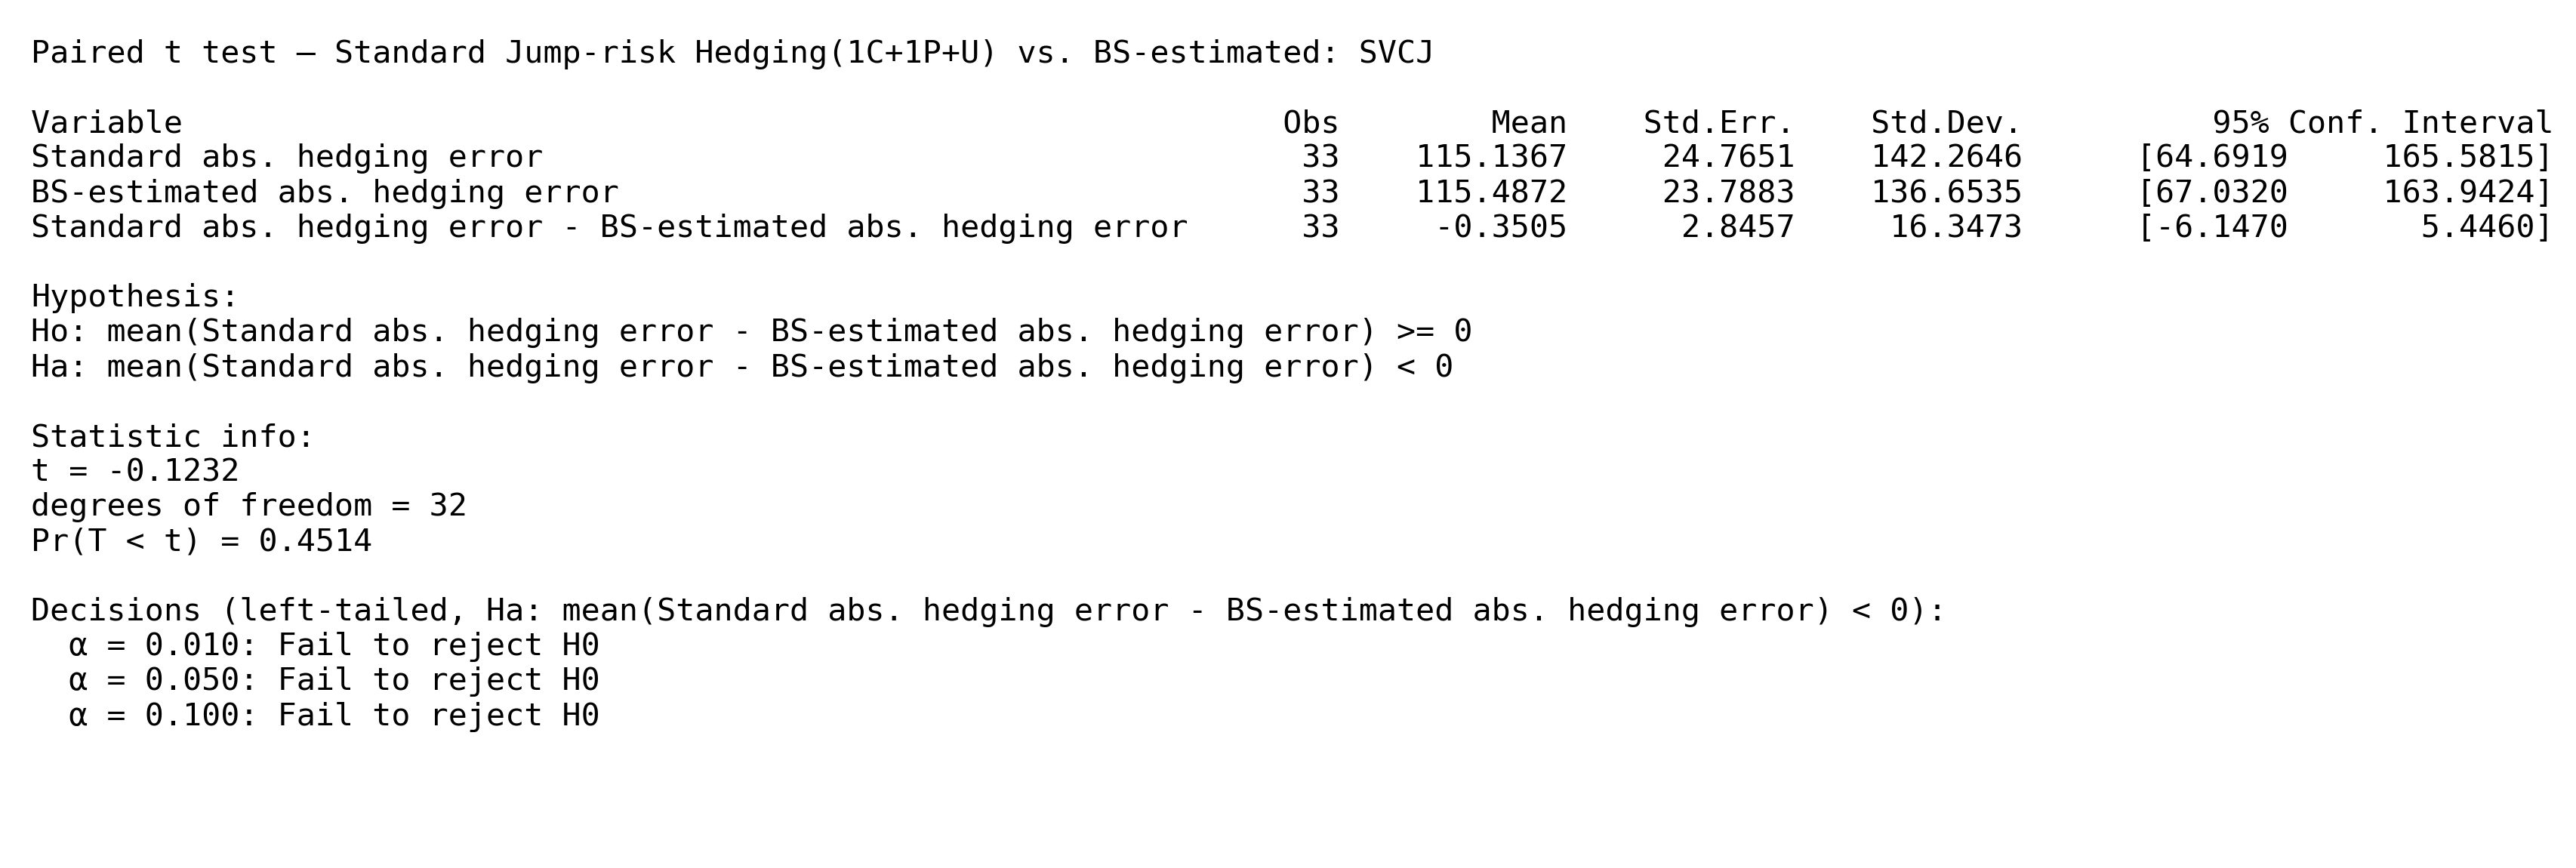
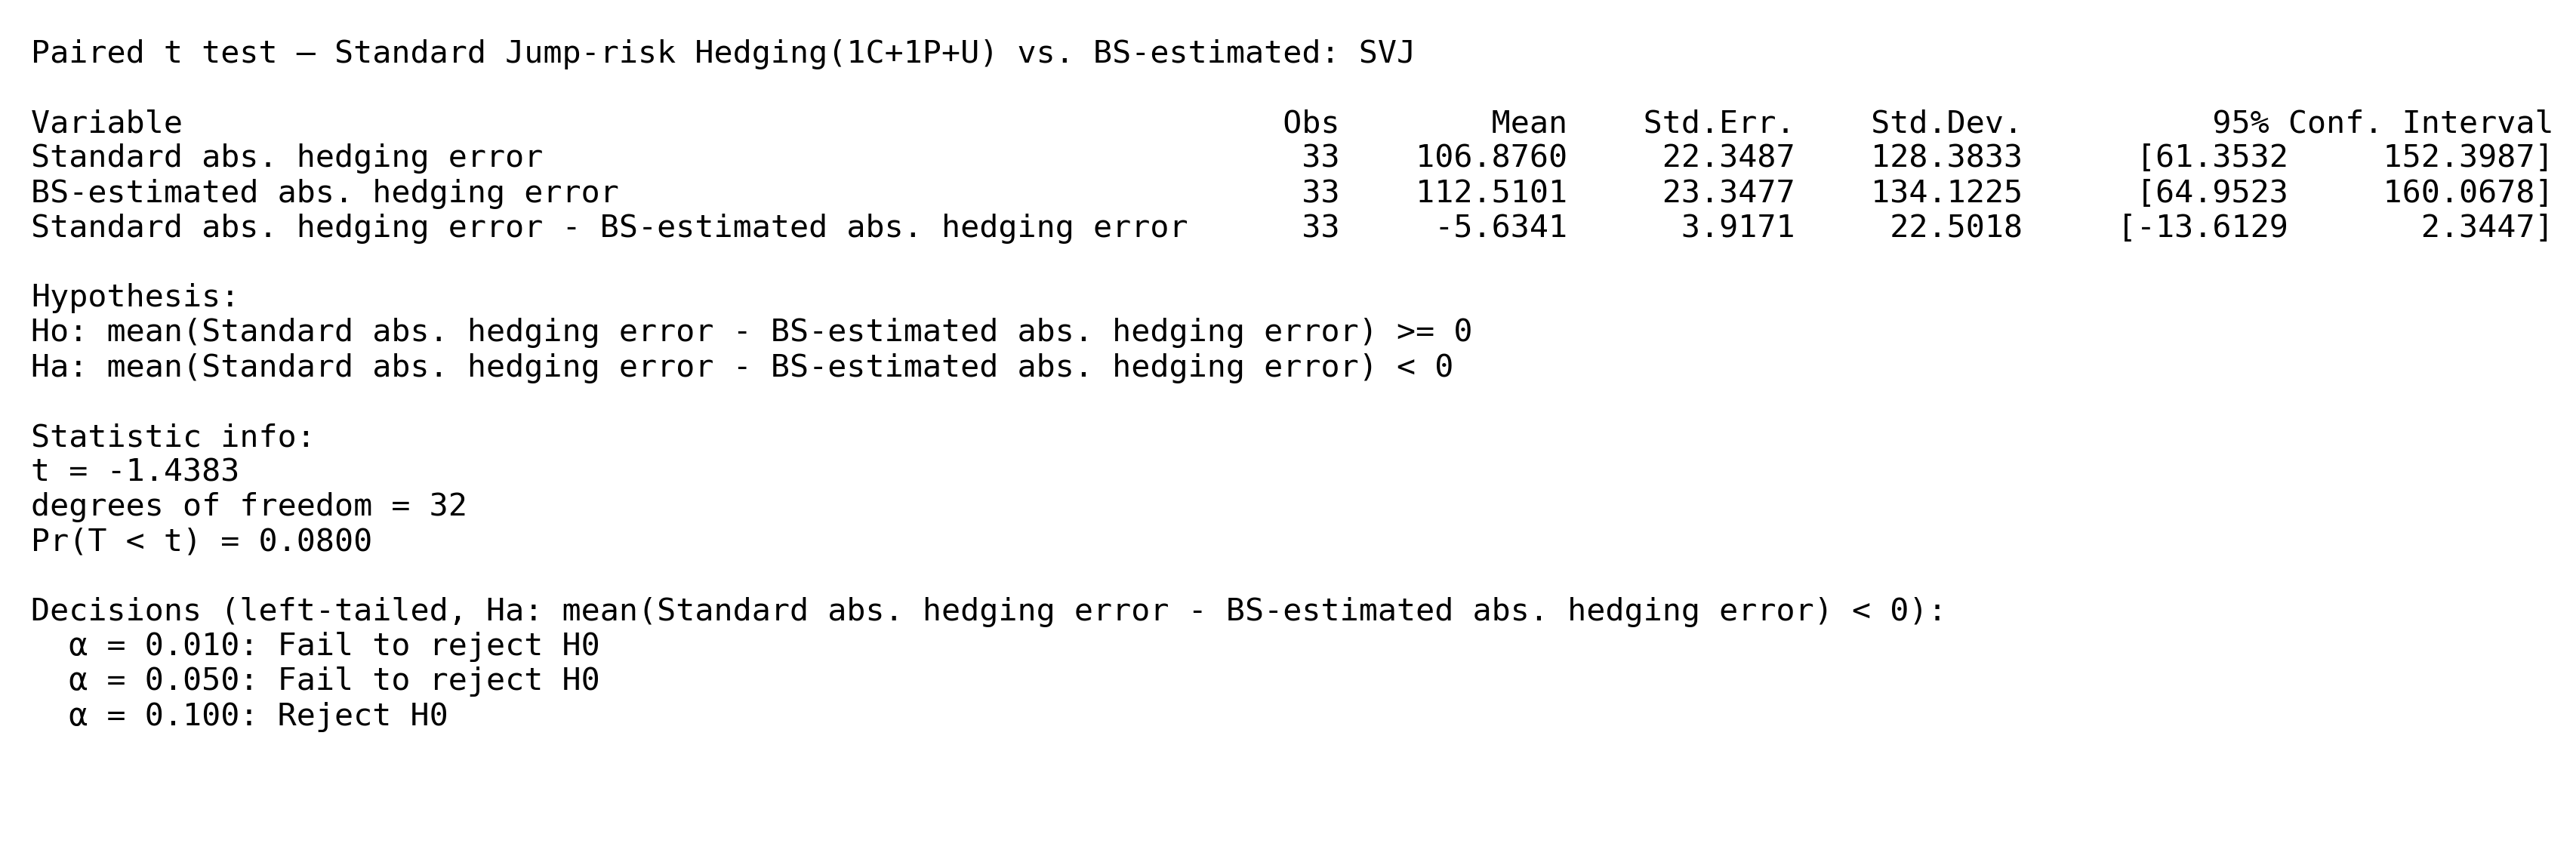
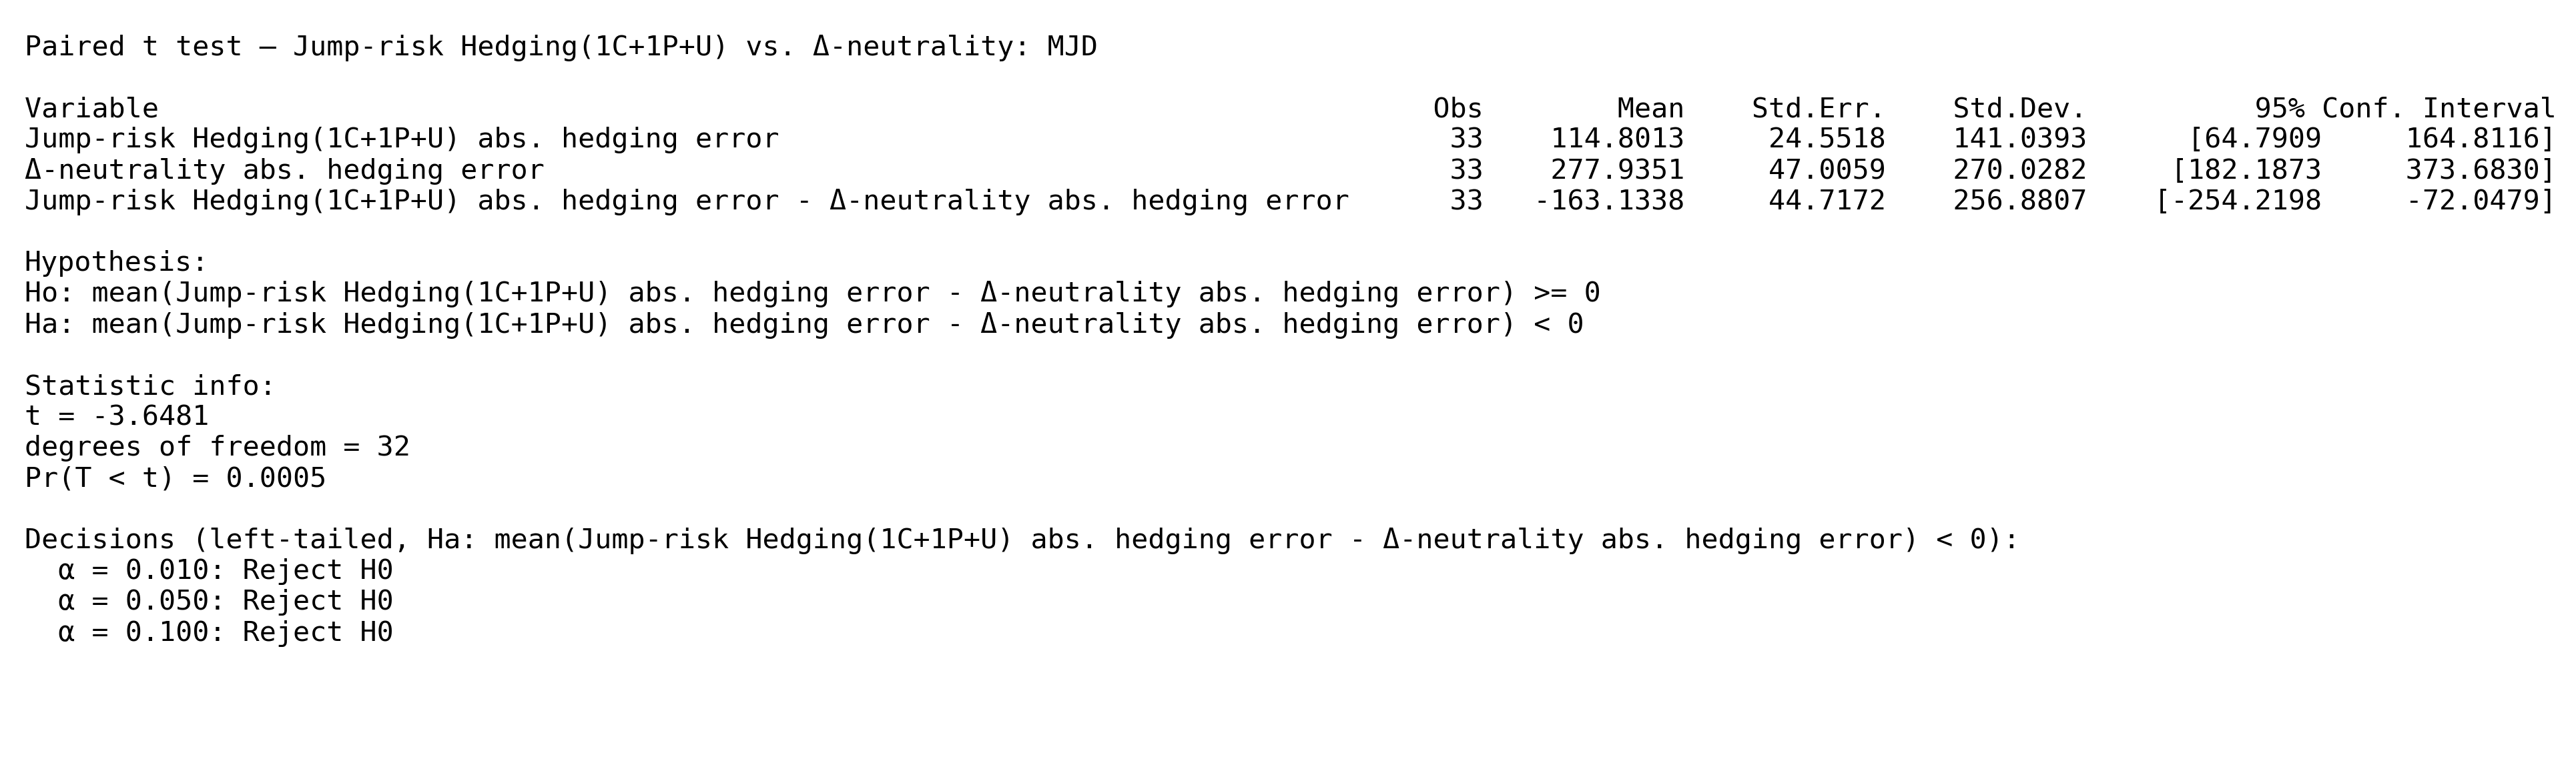
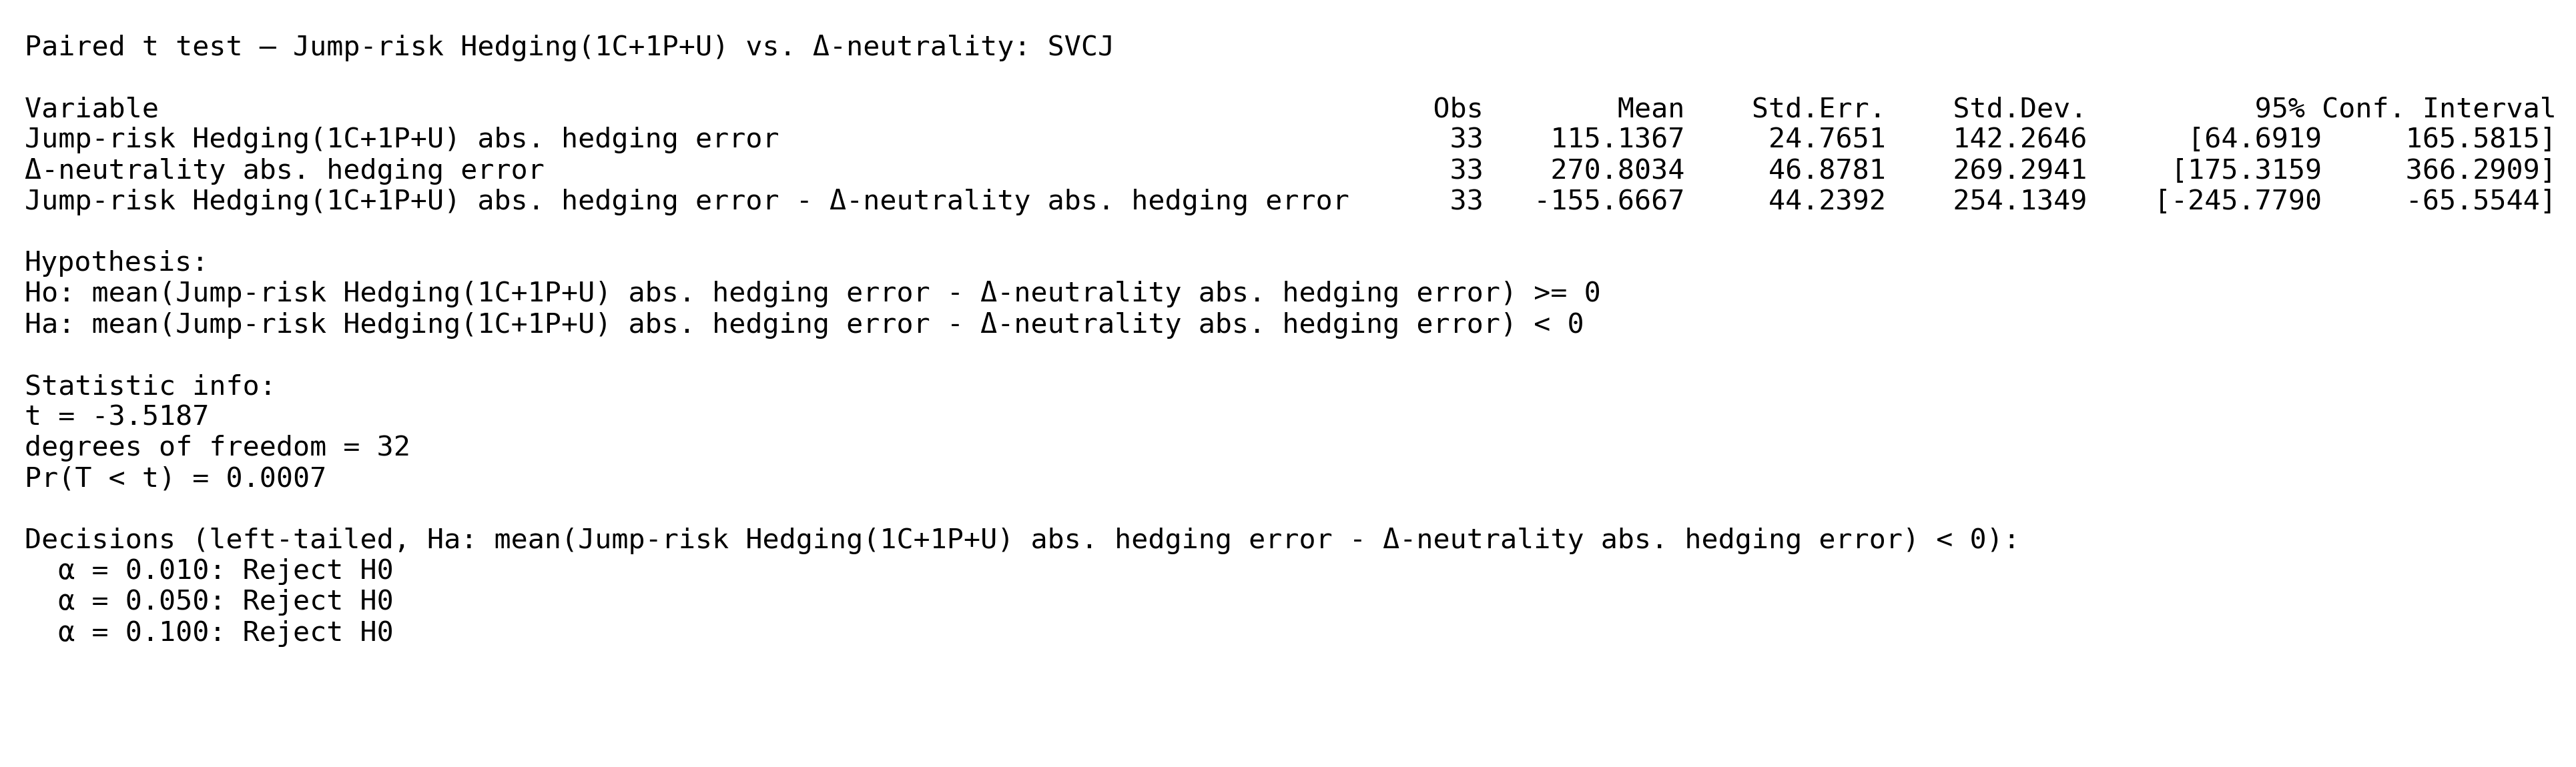
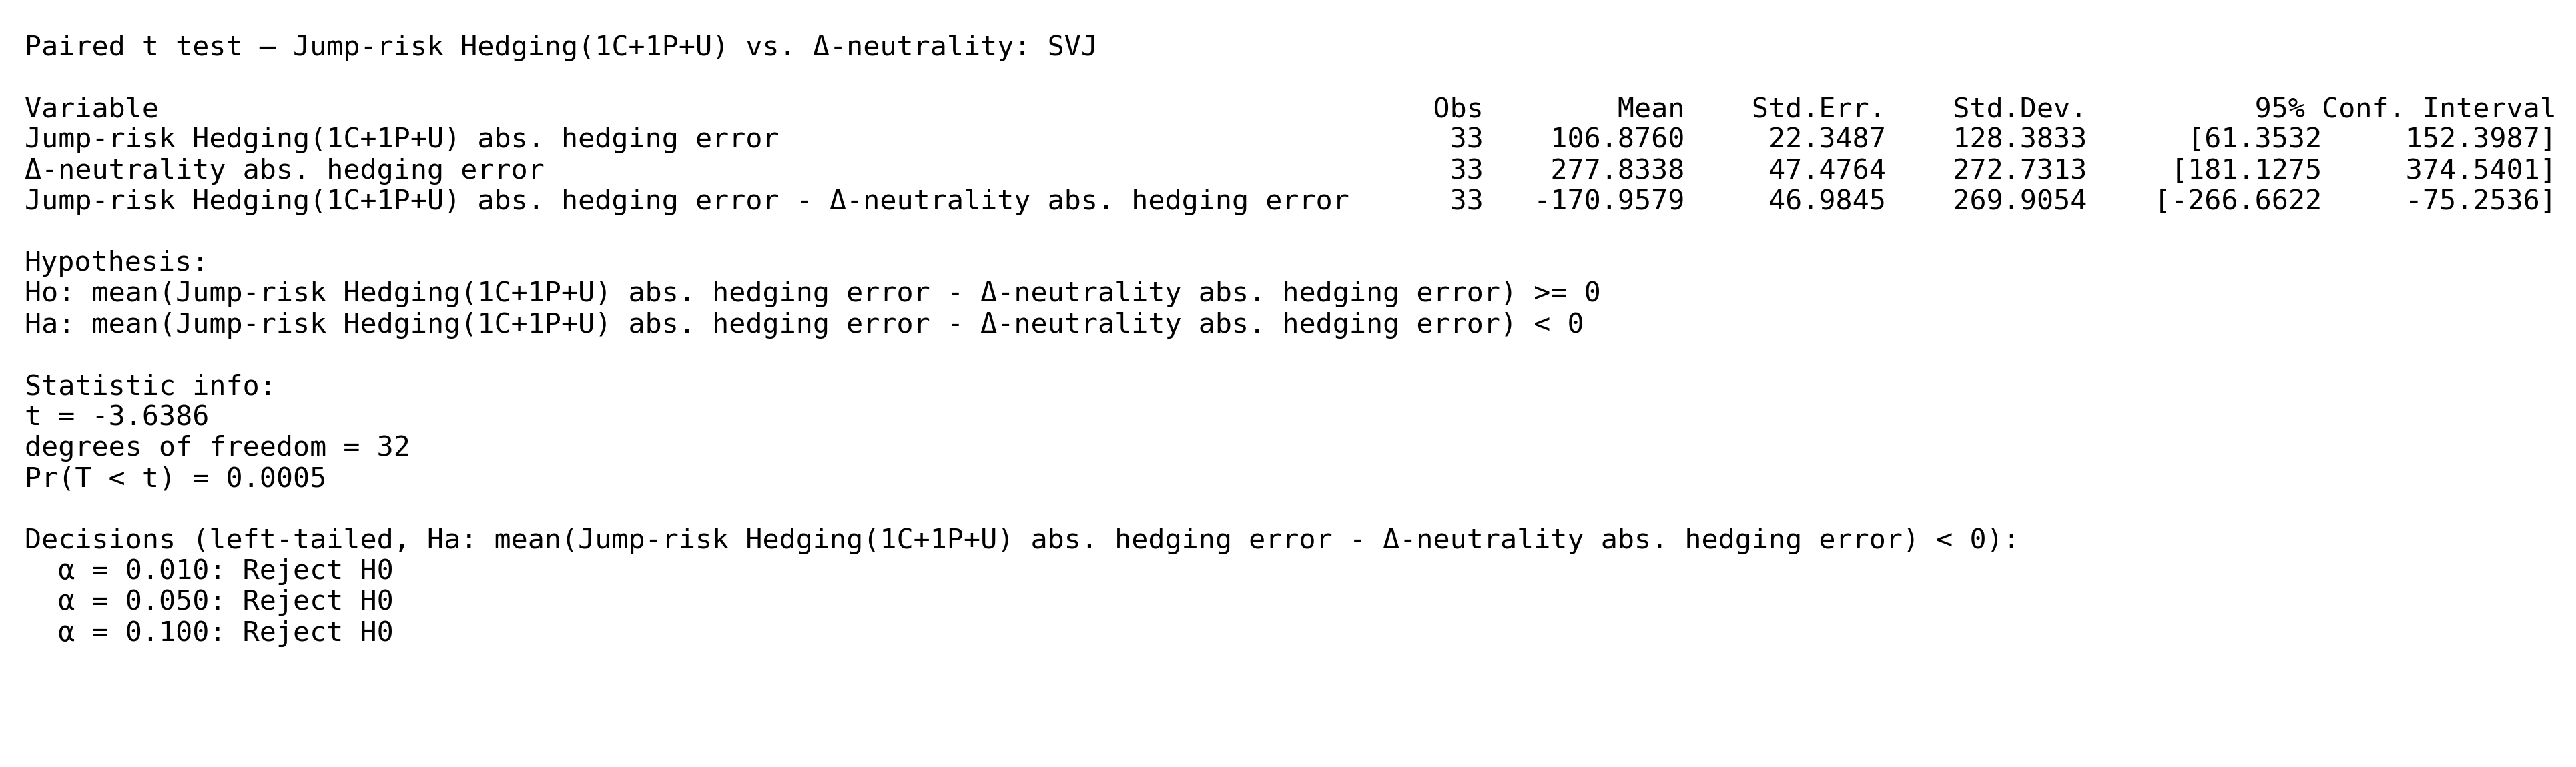
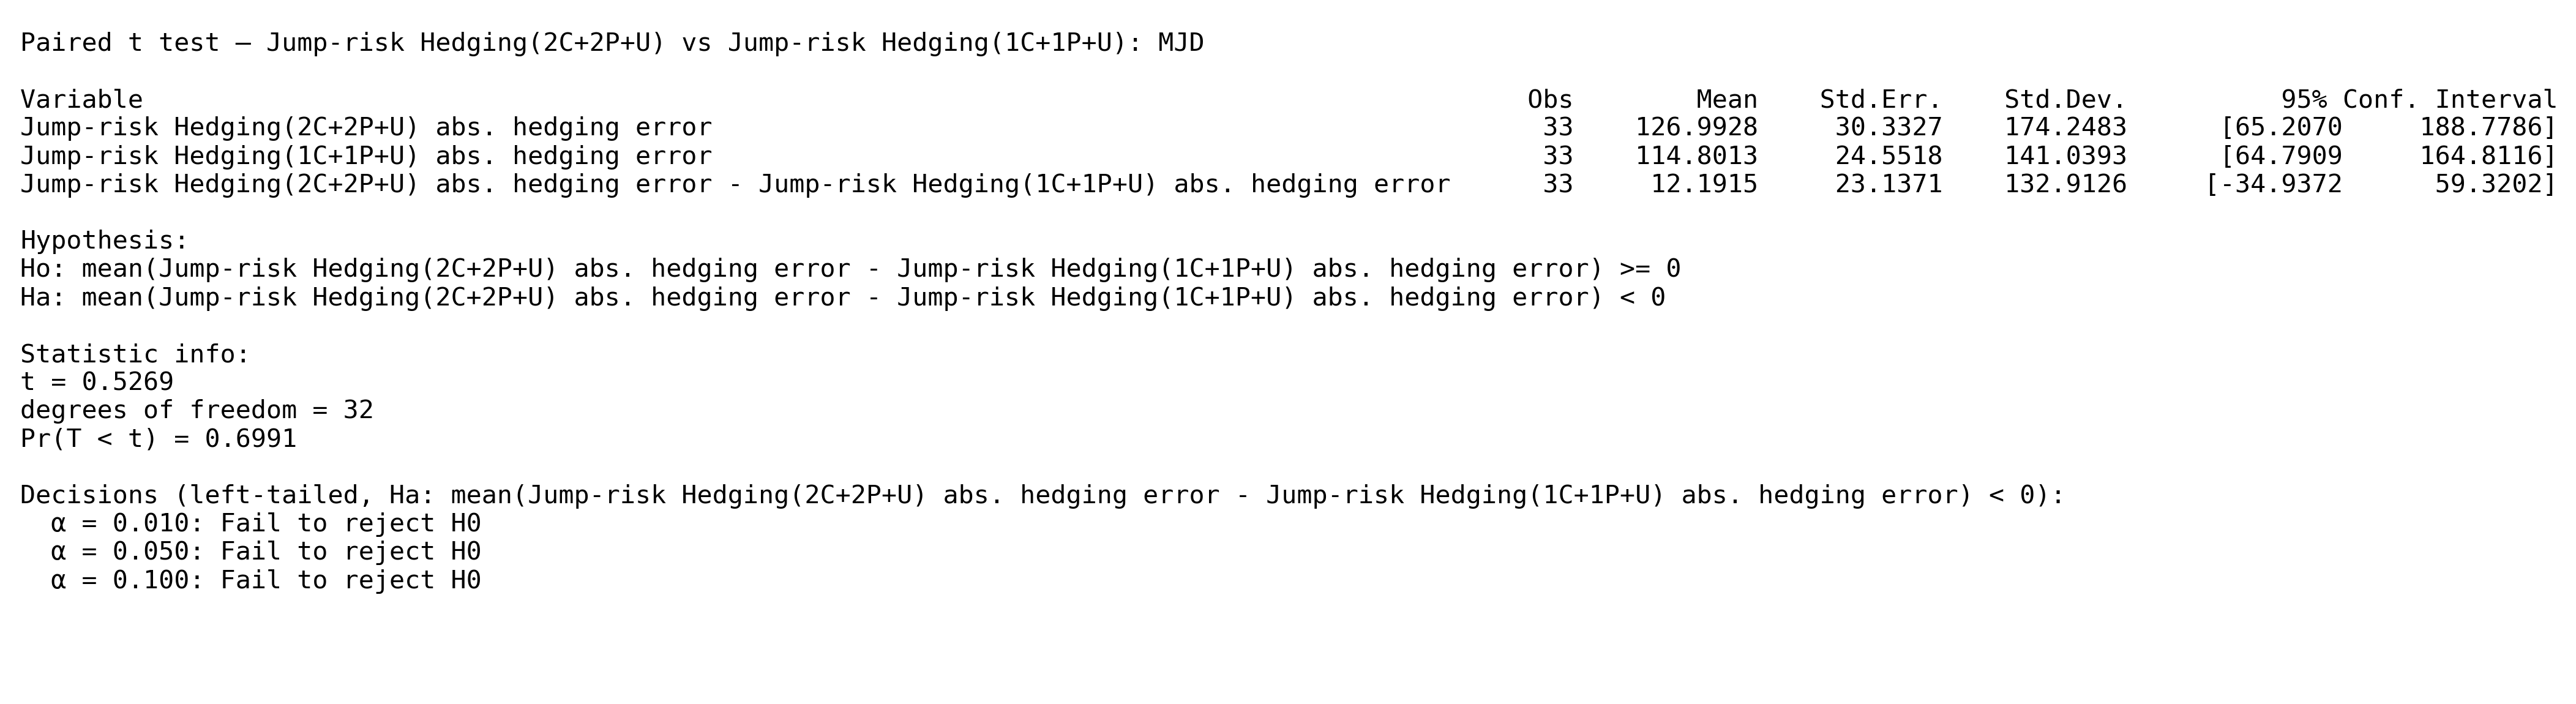
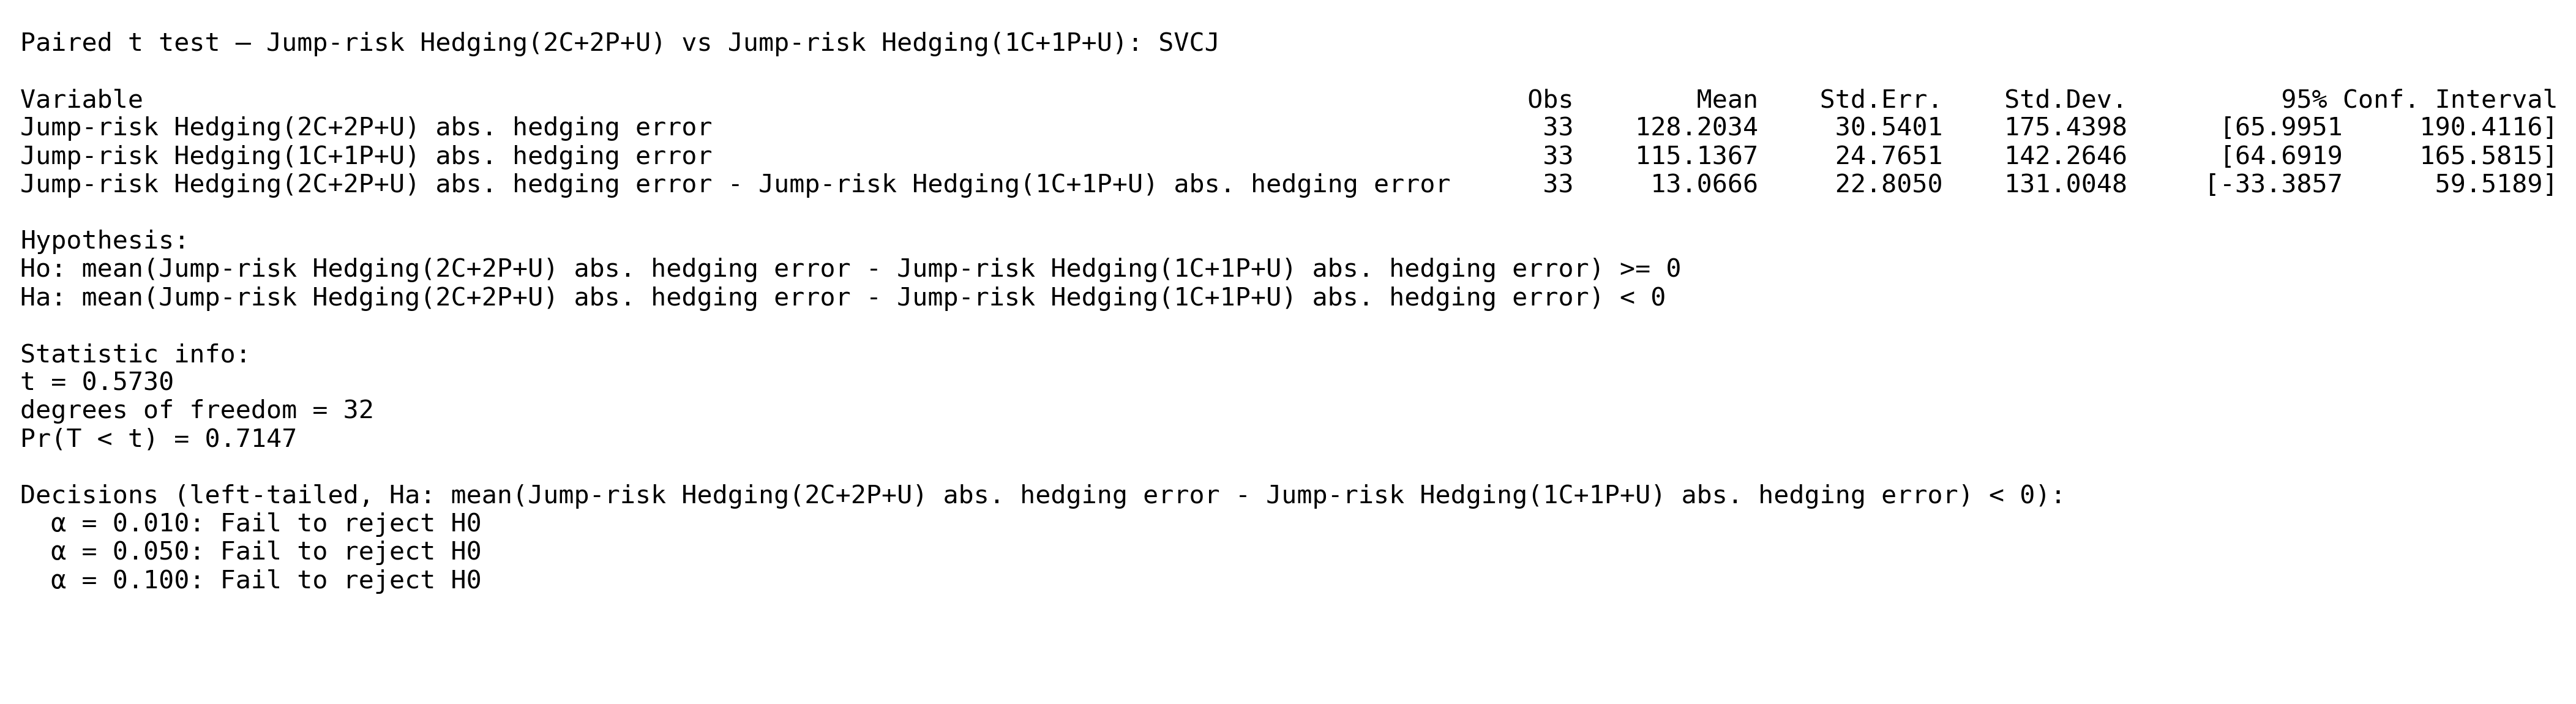
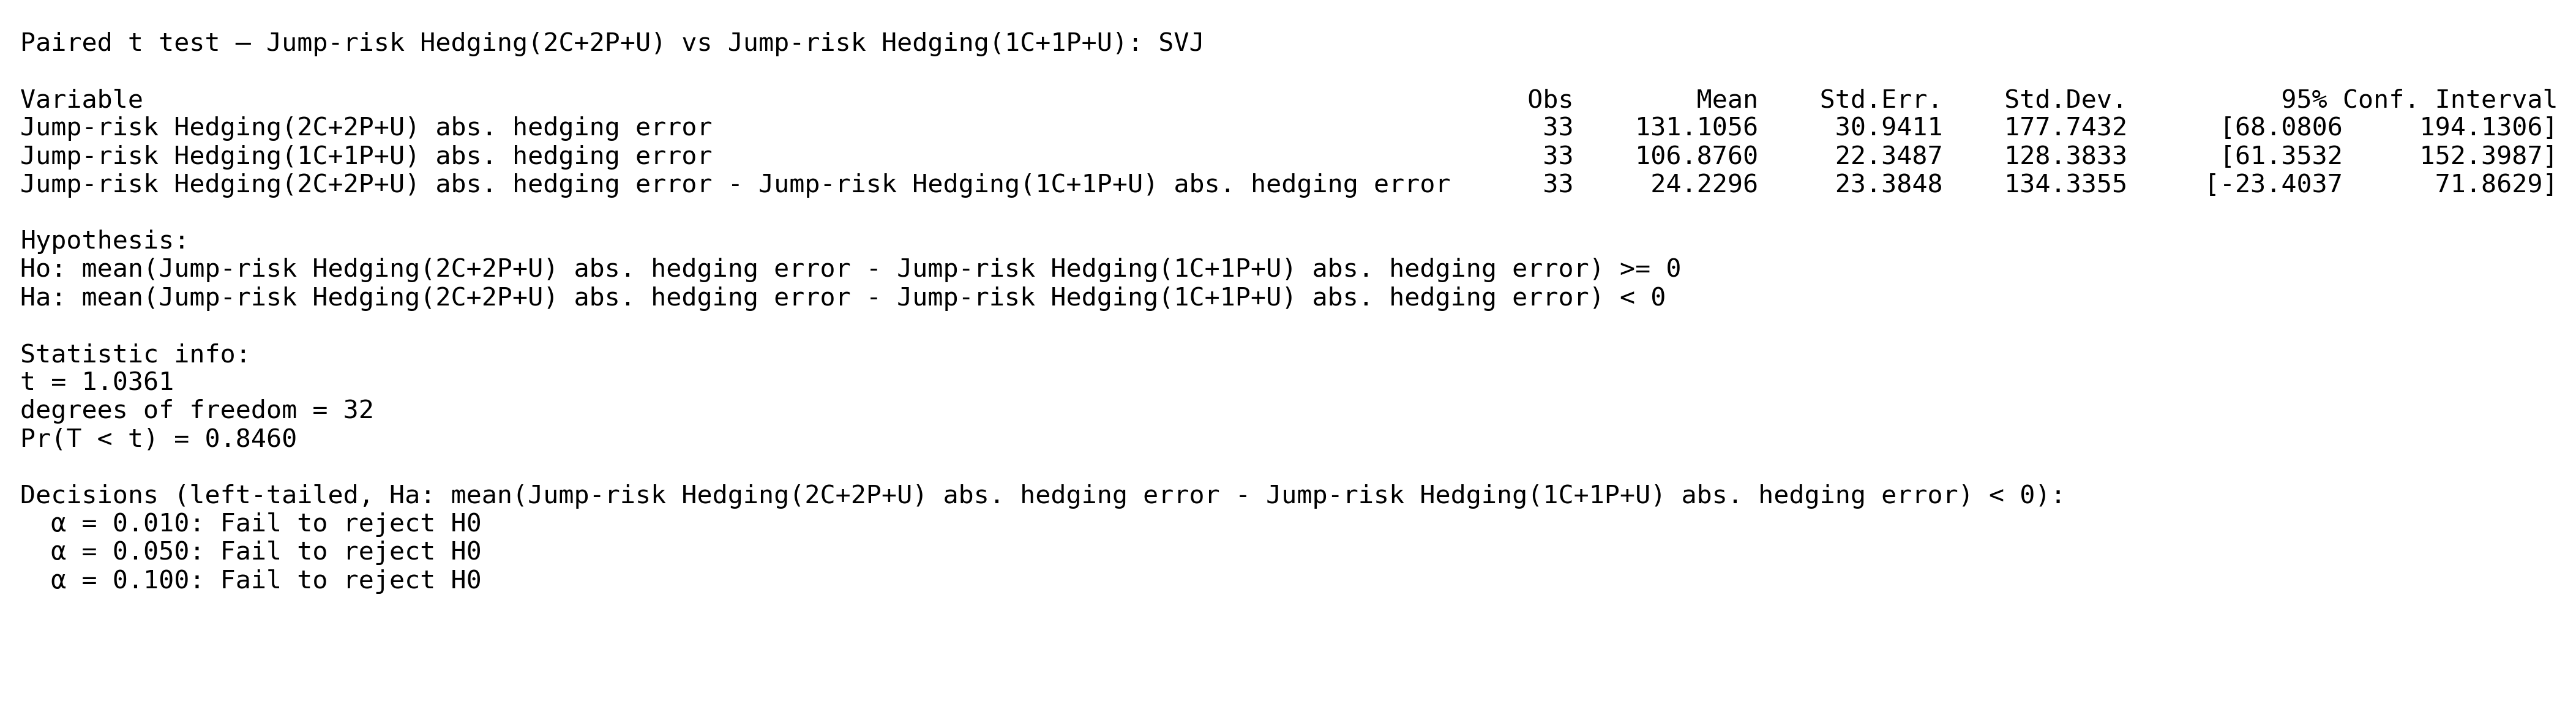


## 1) Δ-neutrality (no options)

- **MJD vs BS** — μ₍Δ₎ = **−3.142**, σ₍Δ₎ = **8.069**; t = **−2.237**; p = **0.0162** → **Reject** at 5% & 10% (not at 1%).  
- **SVJ vs BS** — μ₍Δ₎ = **−3.243**, σ₍Δ₎ = **8.502**; t = **−2.192**; p = **0.0179** → **Reject** at 5% & 10%.  
- **SVCJ vs BS** — μ₍Δ₎ = **−10.274**, σ₍Δ₎ = **19.079**; t = **−3.093**; p = **0.0020** → **Reject** at 1%, 5%, 10%.

**Takeaway:** Under Δ-neutrality, **SVJ** and **SVCJ** deliver **lower errors than BS** (SVCJ strongest); **MJD** is also lower than BS at the 5% level.

---

## 2) Jump-risk Hedging (JH, 1C+1P+U) **vs** Δ-neutrality (same model)

- **MJD (JH − Δ-neutral)** — μ₍Δ₎ = **−163.134**, σ₍Δ₎ = **256.881**; t = **−3.648**; p = **0.0005** → **Reject**.  
- **SVJ (JH − Δ-neutral)** — μ₍Δ₎ = **−170.958**, σ₍Δ₎ = **269.905**; t = **−3.639**; p = **0.0005** → **Reject**.  
- **SVCJ (JH − Δ-neutral)** — μ₍Δ₎ = **−155.667**, σ₍Δ₎ = **254.135**; t = **−3.519**; p = **0.0007** → **Reject**.

**Takeaway:** **JH (1C+1P+U)** **dominates** Δ-neutrality for **all** models—large negative means and highly significant.

---

## 3) JH (1C+1P+U) — **model vs model**

- **SVJ vs MJD** — μ₍Δ₎ = **−7.925**, σ₍Δ₎ = **29.240**; t = **−1.557**; p = **0.0646** → **Reject** at 10% only (borderline edge for **SVJ**).  
- **SVCJ vs MJD** — μ₍Δ₎ = **+0.335**, σ₍Δ₎ = **5.585**; t = **+0.345**; p = **0.6338** → **Fail to reject** (≈ tie with **MJD**).

**Takeaway:** With JH, **SVJ** shows a **modest** advantage over **MJD** (10% level); **SVCJ ≈ MJD**.

---

## 4) JH (1C+1P+U) — **implementation**: *Standard* vs *BS-estimated*  
_Difference is **Standard − BS-estimated** (negative favors **Standard**)._

- **MJD** — μ₍Δ₎ = **+2.078**, σ₍Δ₎ = **13.905**; t = **+0.859**; p = **0.8015** → **Fail to reject** (if anything **BS-est ≤ Standard**).  
- **SVJ** — μ₍Δ₎ = **−5.634**, σ₍Δ₎ = **22.502**; t = **−1.438**; p = **0.0800** → **Reject** at 10% only (small edge for **Standard**).  
- **SVCJ** — μ₍Δ₎ = **−0.351**, σ₍Δ₎ = **16.347**; t = **−0.123**; p = **0.4514** → **Fail to reject** (no difference).

**Takeaway:** Implementation choice **rarely matters**: a slight **Standard** benefit for **SVJ** (10%); otherwise **no clear winner**.

---

## 5) **Capacity**: (2C+2P+U) vs (1C+1P+U)  
_Difference is **(2C+2P+U) − (1C+1P+U)** (negative would favor more instruments)._

- **MJD** — μ₍Δ₎ = **+12.192**, σ₍Δ₎ = **132.913**; t = **+0.527**; p = **0.6991** → **Fail to reject**.  
- **SVJ** — μ₍Δ₎ = **+24.230**, σ₍Δ₎ = **134.336**; t = **+1.036**; p = **0.8460** → **Fail to reject**.  
- **SVCJ** — μ₍Δ₎ = **+13.067**, σ₍Δ₎ = **131.005**; t = **+0.573**; p = **0.7147** → **Fail to reject**.

**Takeaway:** **Adding a second call & put does not reduce error**; (2C+2P+U) is **no better** than (1C+1P+U) for any model.

---

### Bottom line (tests)
- **Δ-neutrality:** **SVJ/SVCJ < BS**; **MJD < BS** at 5%.  
- **JH vs Δ-neutral:** **Huge improvements** for all models.  
- **Within JH:** **SVJ ≲ MJD** (borderline better); **SVCJ ≈ MJD**.  
- **Implementation:** Differences are **small**; only a mild **Standard** edge for **SVJ**.  
- **Capacity:** **No measurable gain** from 2C+2P+U on this sample.
